In [24]:
import importlib
import retinanalysis as ra
from retinanalysis import dedup as dd
importlib.reload(dd)
importlib.reload(ra)
import pandas as pd
import numpy as np
ra.settings.mea_config
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

In [3]:
#start with a noise file
df_1 = ra.get_datasets_from_protocol_names('.SpatialNoise')
df_1[df_1['exp_name'] == '20250514C']


Found 2 protocols matching ".spatialnoise":
['manookinlab.protocols.SpatialNoise'
 'manookinlab.protocols.SpatialNoiseAndMotion']

Found 44 experiments, 198 epoch blocks.



exp_name datafile_name  NDF chunk_name  \
177  20250514C       data000  0.5     chunk1   
178  20250514C       data001  0.5     chunk1   
179  20250514C       data006  0.5     chunk2   
180  20250514C       data010  0.5     chunk3   

                          protocol_name  is_mea           data_dir  \
177  manookinlab.protocols.SpatialNoise       1  20250514C/data000   
178  manookinlab.protocols.SpatialNoise       1  20250514C/data001   
179  manookinlab.protocols.SpatialNoise       1  20250514C/data006   
180  manookinlab.protocols.SpatialNoise       1  20250514C/data010   

             group_label  experiment_id  protocol_id  group_id  block_id  \
177        Spatial Noise            125           26      2293      3383   
178        Spatial Noise            125           26      2293      3384   
179  Spatial Noise 30 R*            125           26      2298      3389   
180       noise photopic            125           26      2302      3393   

     chunk_id  
177       485  
178       485  
179       486  
180       492

In [ ]:
#set up our stimulus block and analysis chunk
sb = ra.StimBlock(df_1.at[177, 'exp_name'], df_1.at[177, 'datafile_name'])
ac = ra.AnalysisChunk(df_1.at[177, 'exp_name'], sb.nearest_noise_chunk)

Nearest noise chunk for data000 is chunk1 with distance 4 minutes.

Loading VCD from /Volumes/data/analysis/20250514C/chunk1/kilosort2.5 ...
VCD loaded with 781 cells.
Loaded spatial maps for channels [0, 2] and 781 cells of shape (127, 203, 2)
Spatial maps have been padded to align with RF parameters.


In [21]:
#load in kilosort files, and add them in together so that we can analyze 
#TODO: make this a function
amps = np.load('/Volumes/data/data/sorted/20250514C/chunk1/kilosort2.5/amplitudes.npy')
templates = np.load('/Volumes/data/data/sorted/20250514C/chunk1/kilosort2.5/spike_templates.npy')

templates_vision = templates + 1
amplitudes = np.vstack((np.squeeze(amps), np.squeeze(templates_vision)))

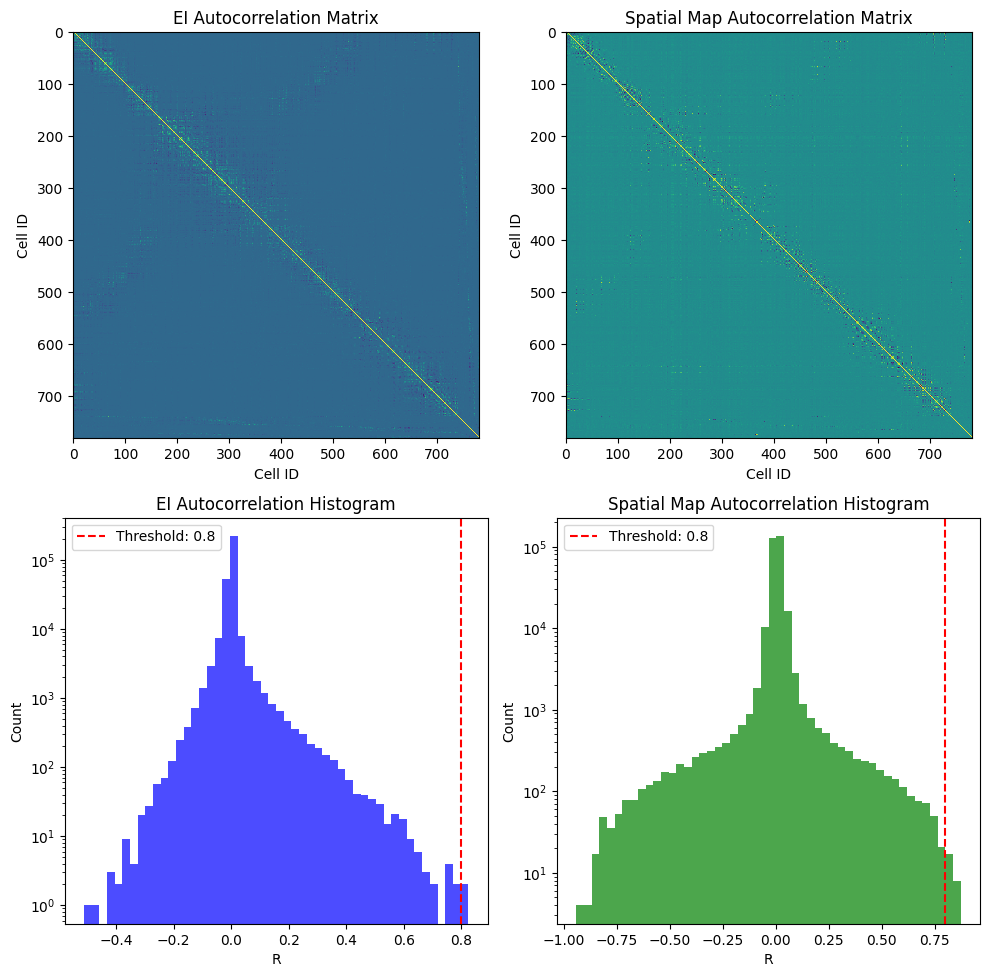

In [ ]:
#plot ei autocorrelation, and spatial map autocorr if available
dd.plot_correlations(ac, ei_method='full', ei_threshold=0.8, sm_threshold=0.8);

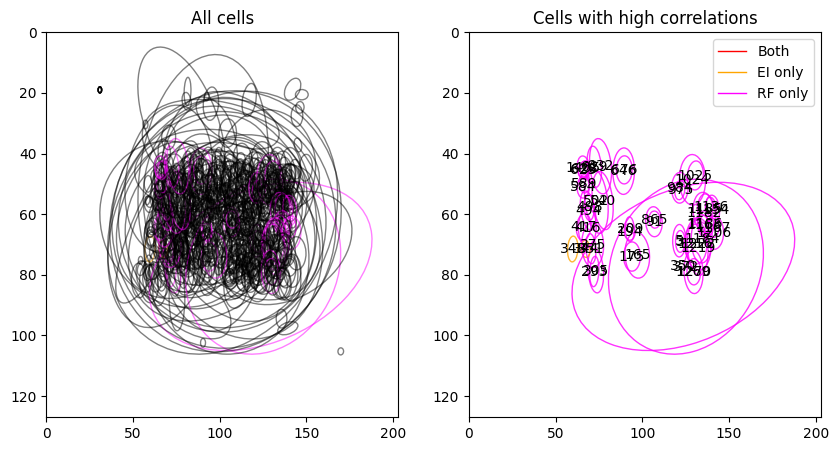

In [ ]:
#if available, plot all RFs and the RFs for the problem clusters
dd.plotRFs_dedup(ac, ei_method='full', ei_threshold=0.8, sm_threshold=0.8);

In [ ]:
#generate dataframe for all pairwise metrics for above-threshold clusters (in either ei or sm category)
#extended_pairs is a set of tuples of transitively related cells in the above-threshold correlation pairs
summary_stats, extended_pairs = dd.get_summary_stats(ac, amplitudes, ei_method='full', ei_threshold=0.8, sm_threshold=0.8)
summary_stats

/Users/racheloaks-leaf/anaconda3/envs/analysis/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/racheloaks-leaf/anaconda3/envs/analysis/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


cluster_a  cluster_b   ei_corr   sm_corr  overlap_fraction
0        1269       1270  0.348074  0.816738          0.000080
1         494        498  0.116579  0.873968          0.001114
2         194        209  0.122961  0.865273          0.817409
3         416        417  0.257768  0.840111          0.708154
4         975        984  0.052006  0.811850          0.048356
5        1167       1206 -0.154123  0.803321          0.010805
6         625        628  0.048340  0.807710          0.900132
7         625       1405 -0.026668  0.849013          0.994993
8         628       1405 -0.053396  0.679455          0.819943
9         344        348  0.823695  0.066458          0.407436
10        351        375  0.271857  0.815873          0.025420
11       1024       1025  0.251664  0.805337          0.438685
12       1136       1154  0.092777  0.826615          0.018828
13        165        175  0.090422  0.830937          0.244717
14        584        589 -0.061545  0.829547          0.000000
15       1163       1186  0.043745  0.828902          0.177776
16        502        540 -0.063899  0.813196          0.996759
17        293        305 -0.138267  0.821261          0.016622
18       1135       1182 -0.163066  0.802637          0.006445
19          3          5  0.521849  0.853526          0.000000
20        646        676  0.004372  0.802221          0.004438
21        350        372  0.371169  0.839123          0.880064
22         91        865  0.071473  0.829180          0.024636
23        629        632  0.103786  0.838546          0.347996
24       1184       1216  0.289994  0.689419          0.068218
25       1184       1219  0.302582  0.678921          0.125745
26       1184       1222  0.218083  0.863647          0.073171
27       1216       1219  0.304190  0.793003          0.968238
28       1216       1222  0.089565  0.827605          0.997157
29       1219       1222  0.458905  0.811662          0.754335

/Users/racheloaks-leaf/anaconda3/envs/analysis/lib/python3.8/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/racheloaks-leaf/anaconda3/envs/analysis/lib/python3.8/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/Users/racheloaks-leaf/Desktop/retinanalysis/src/retinanalysis/dedup.py:297: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(3, n_clusters, figsize=(5*n_clusters, 15))


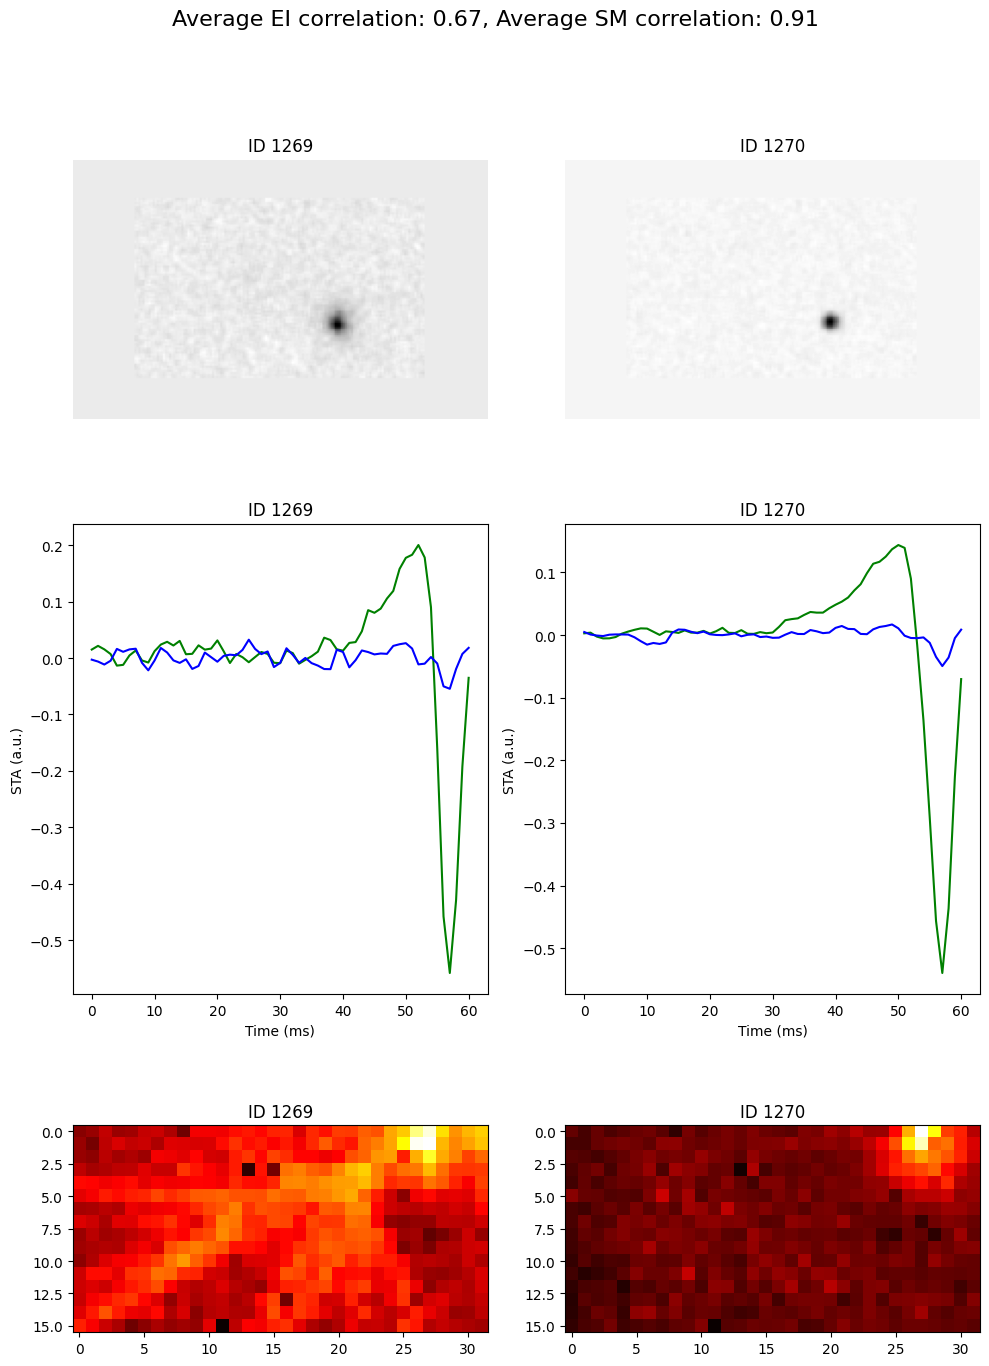

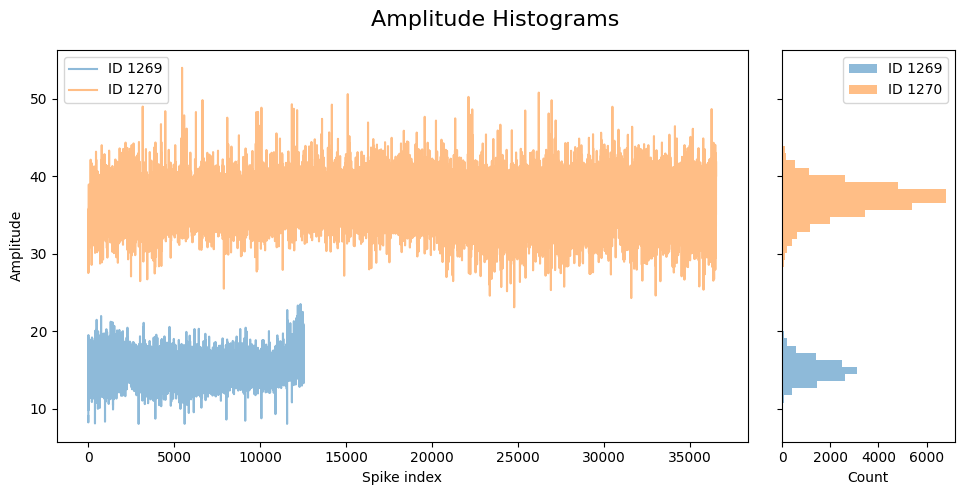

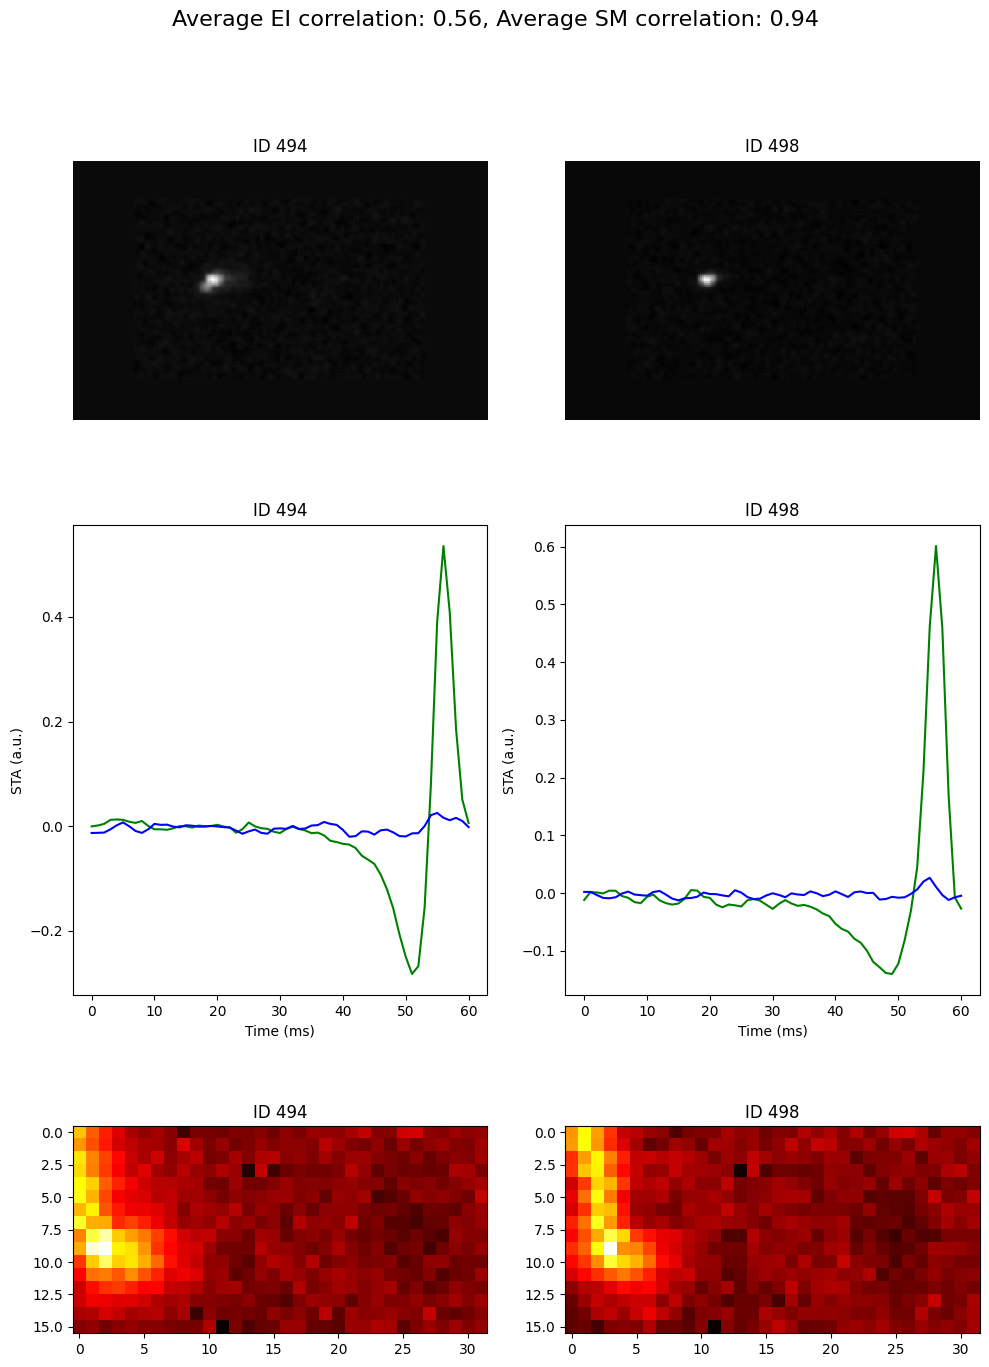

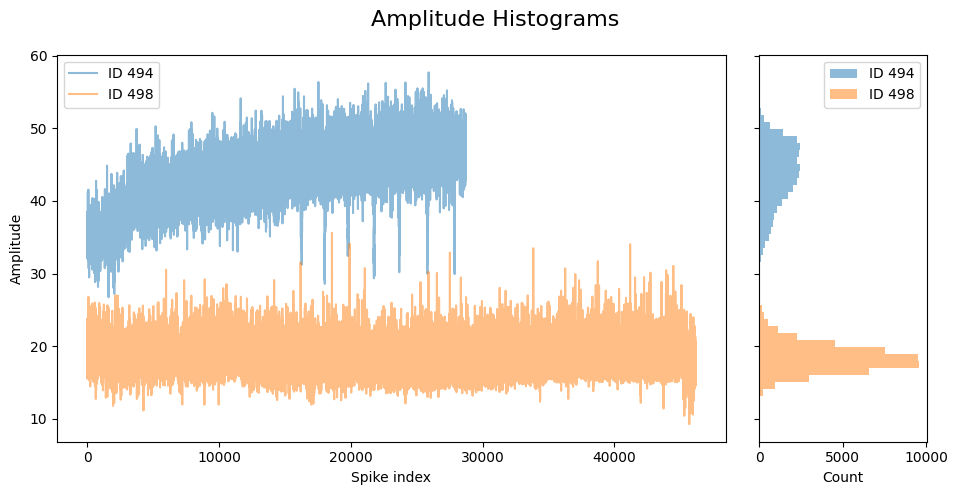

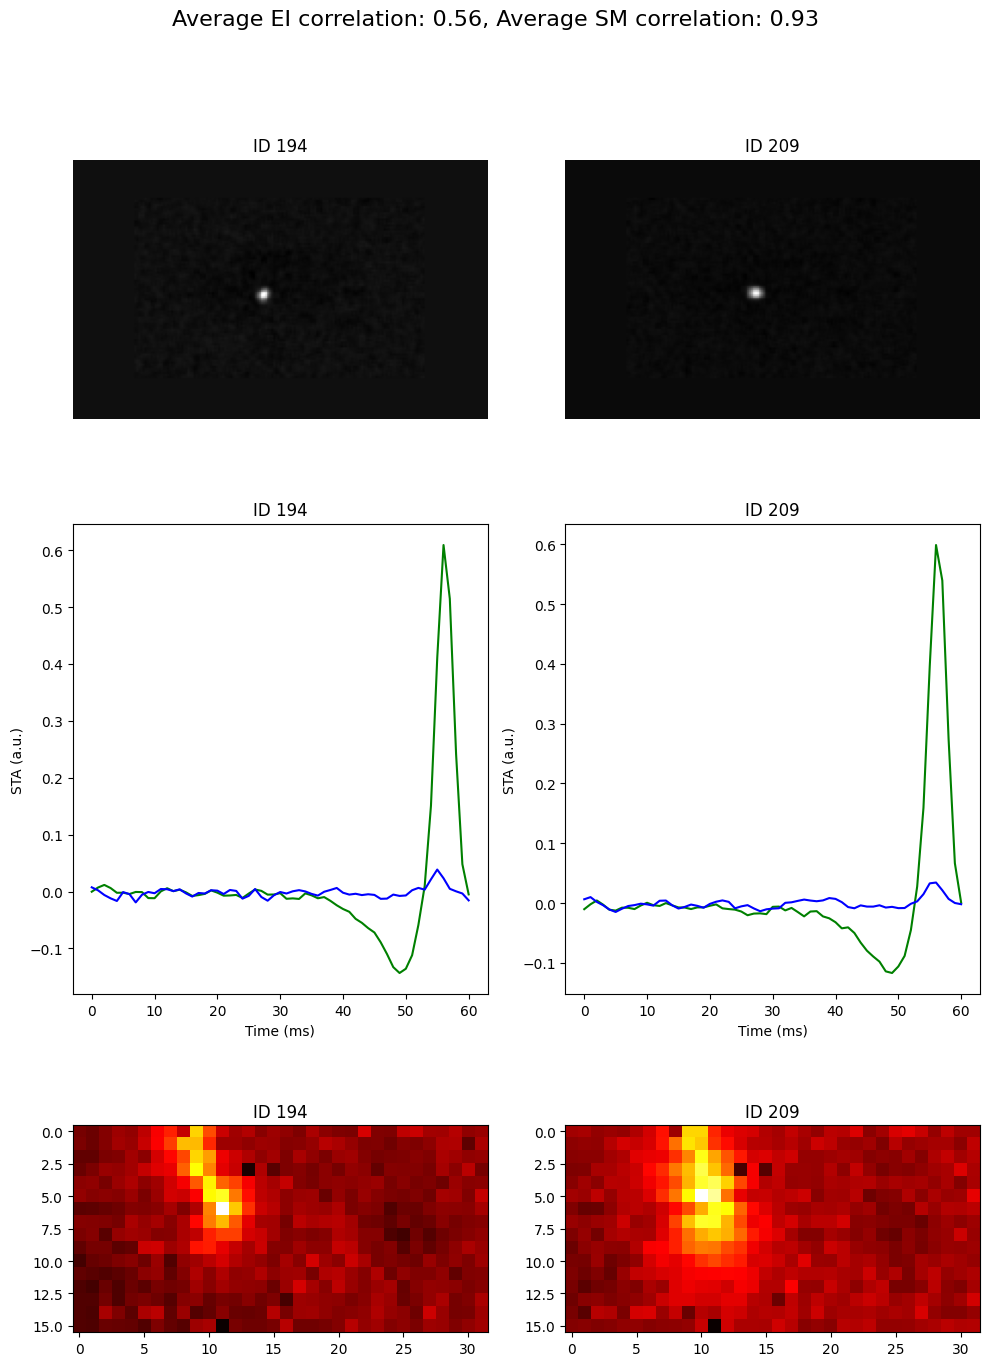

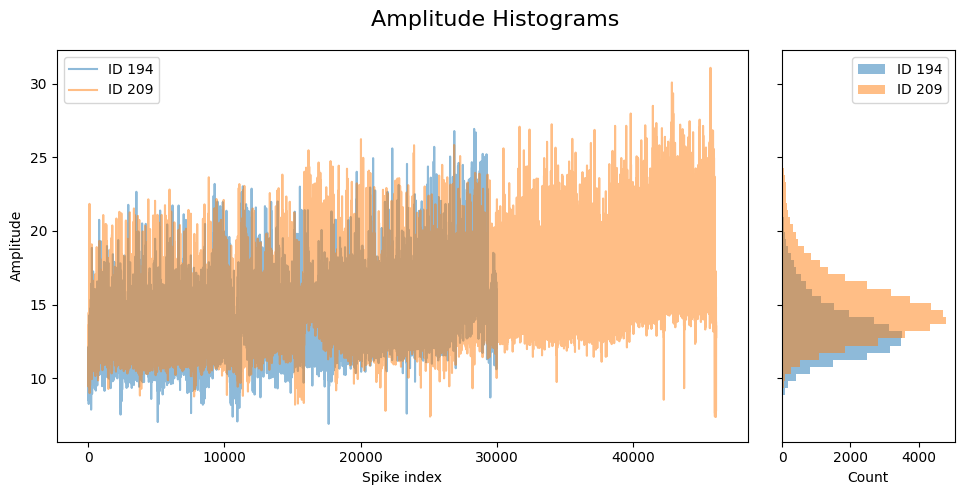

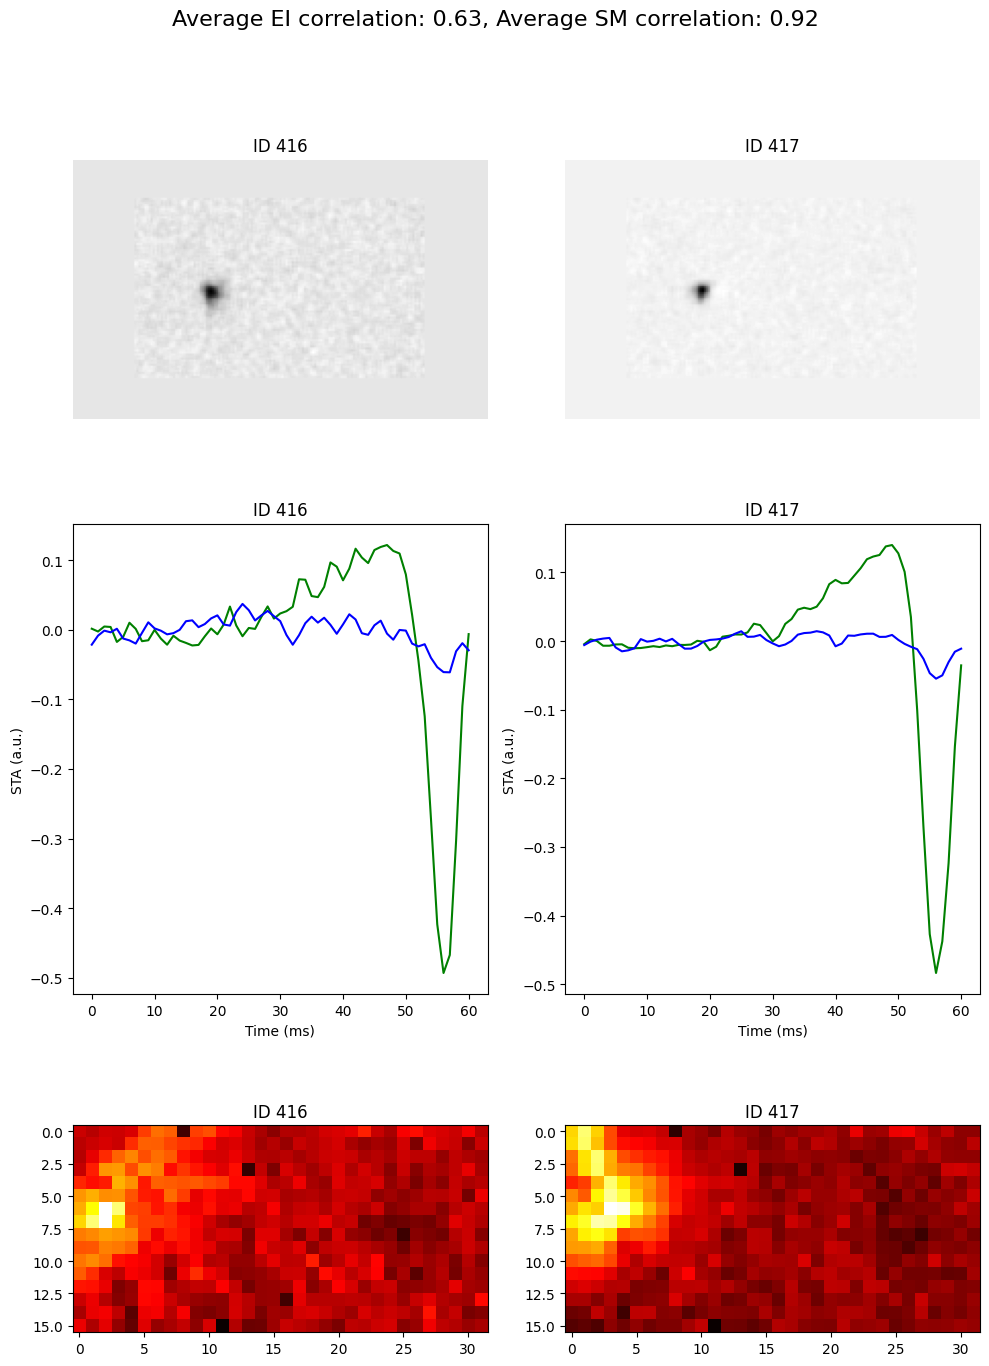

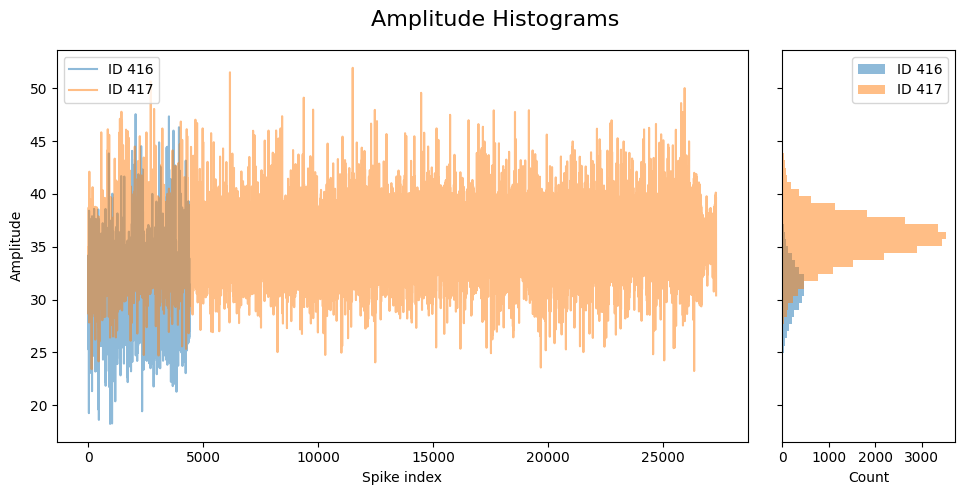

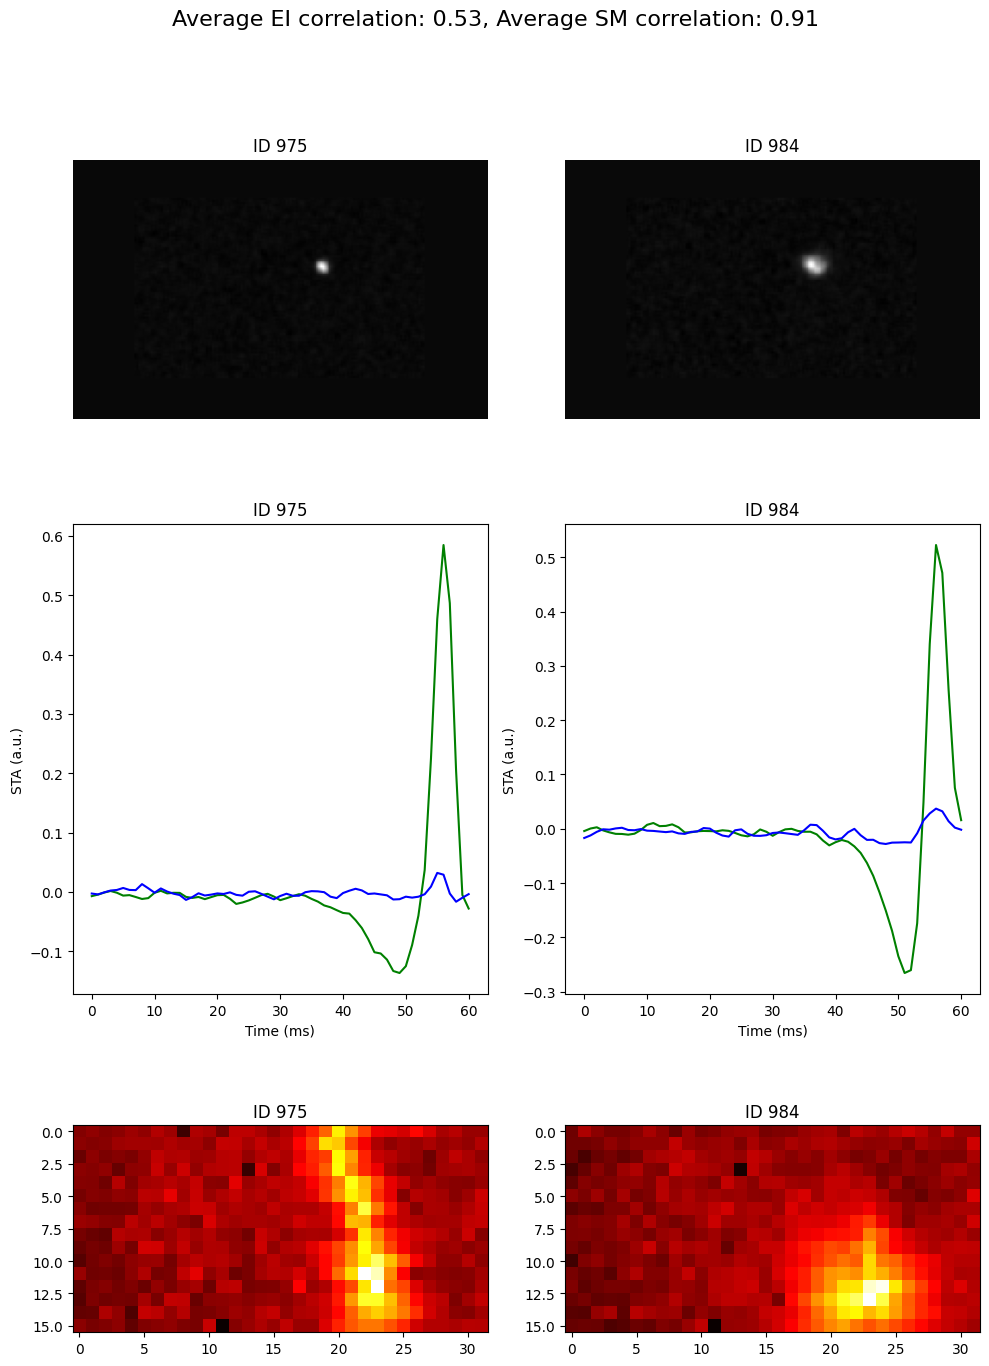

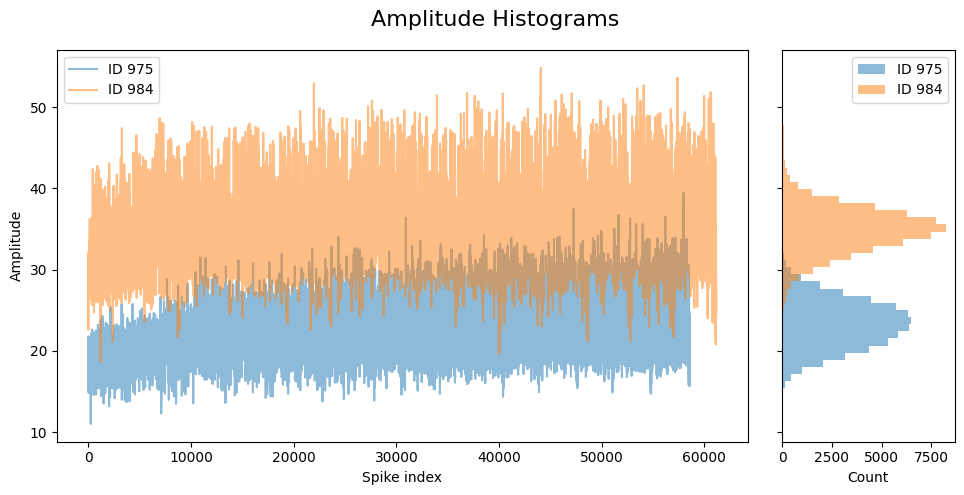

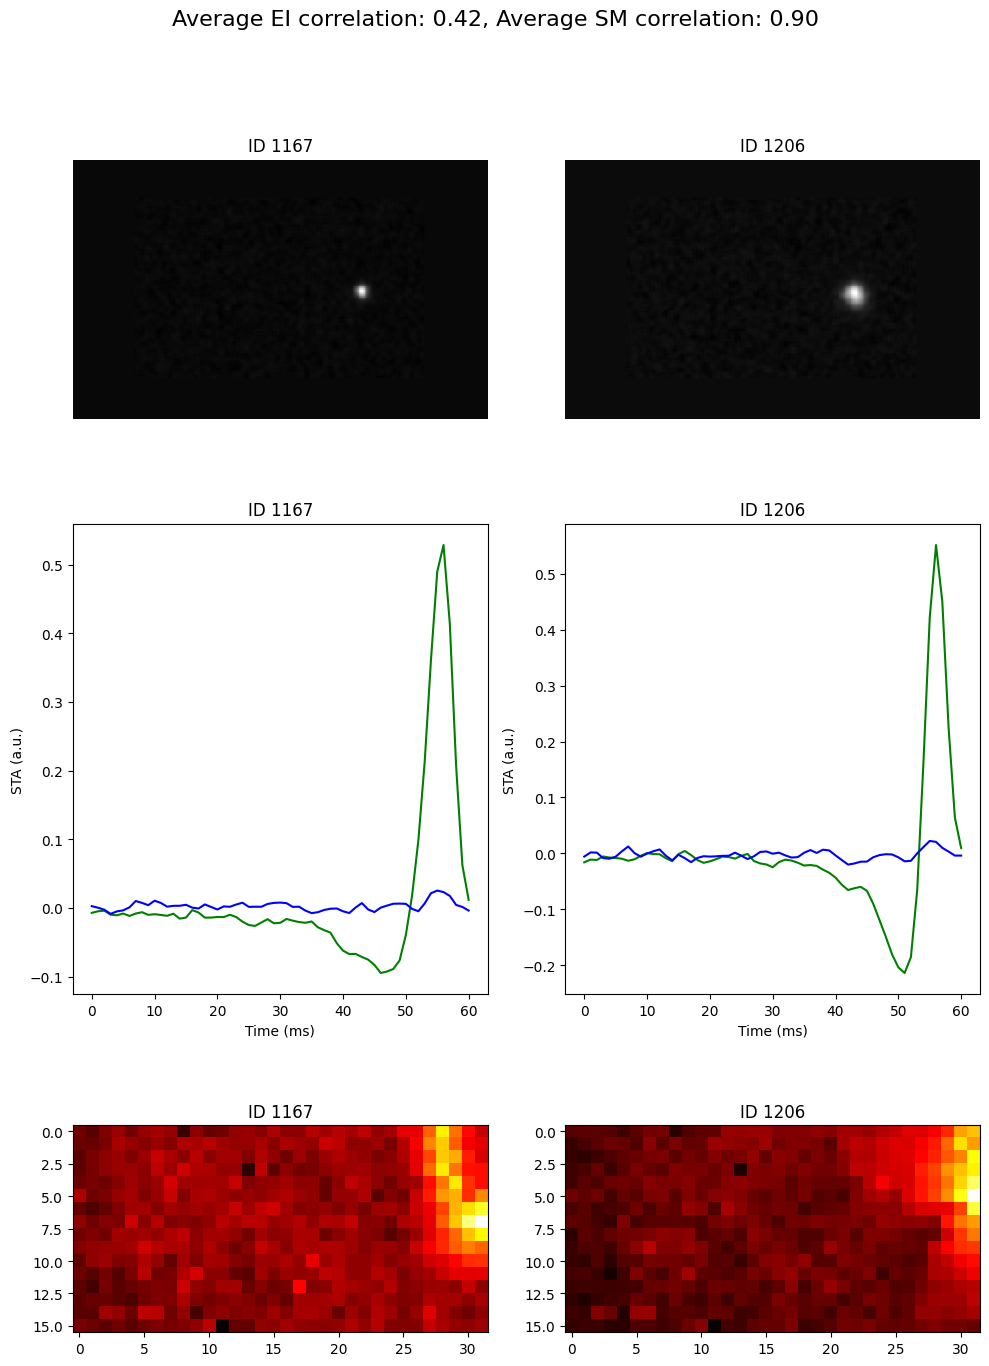

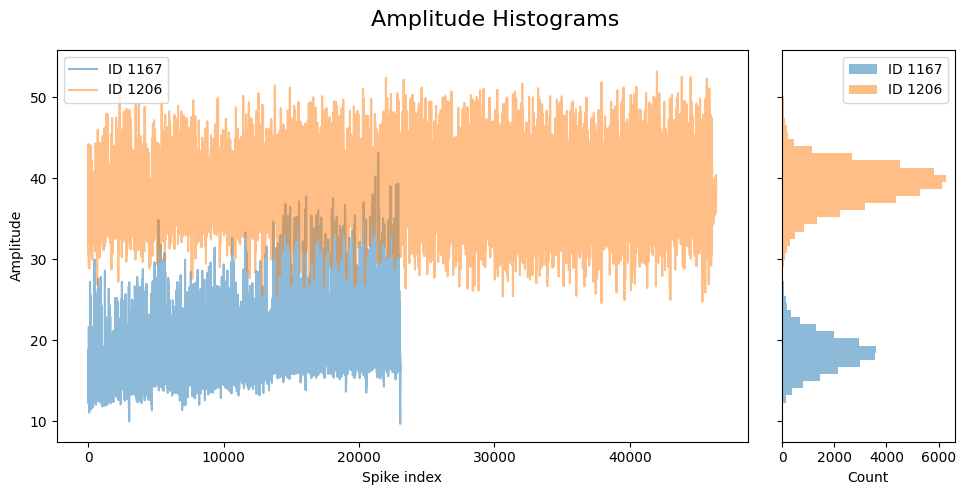

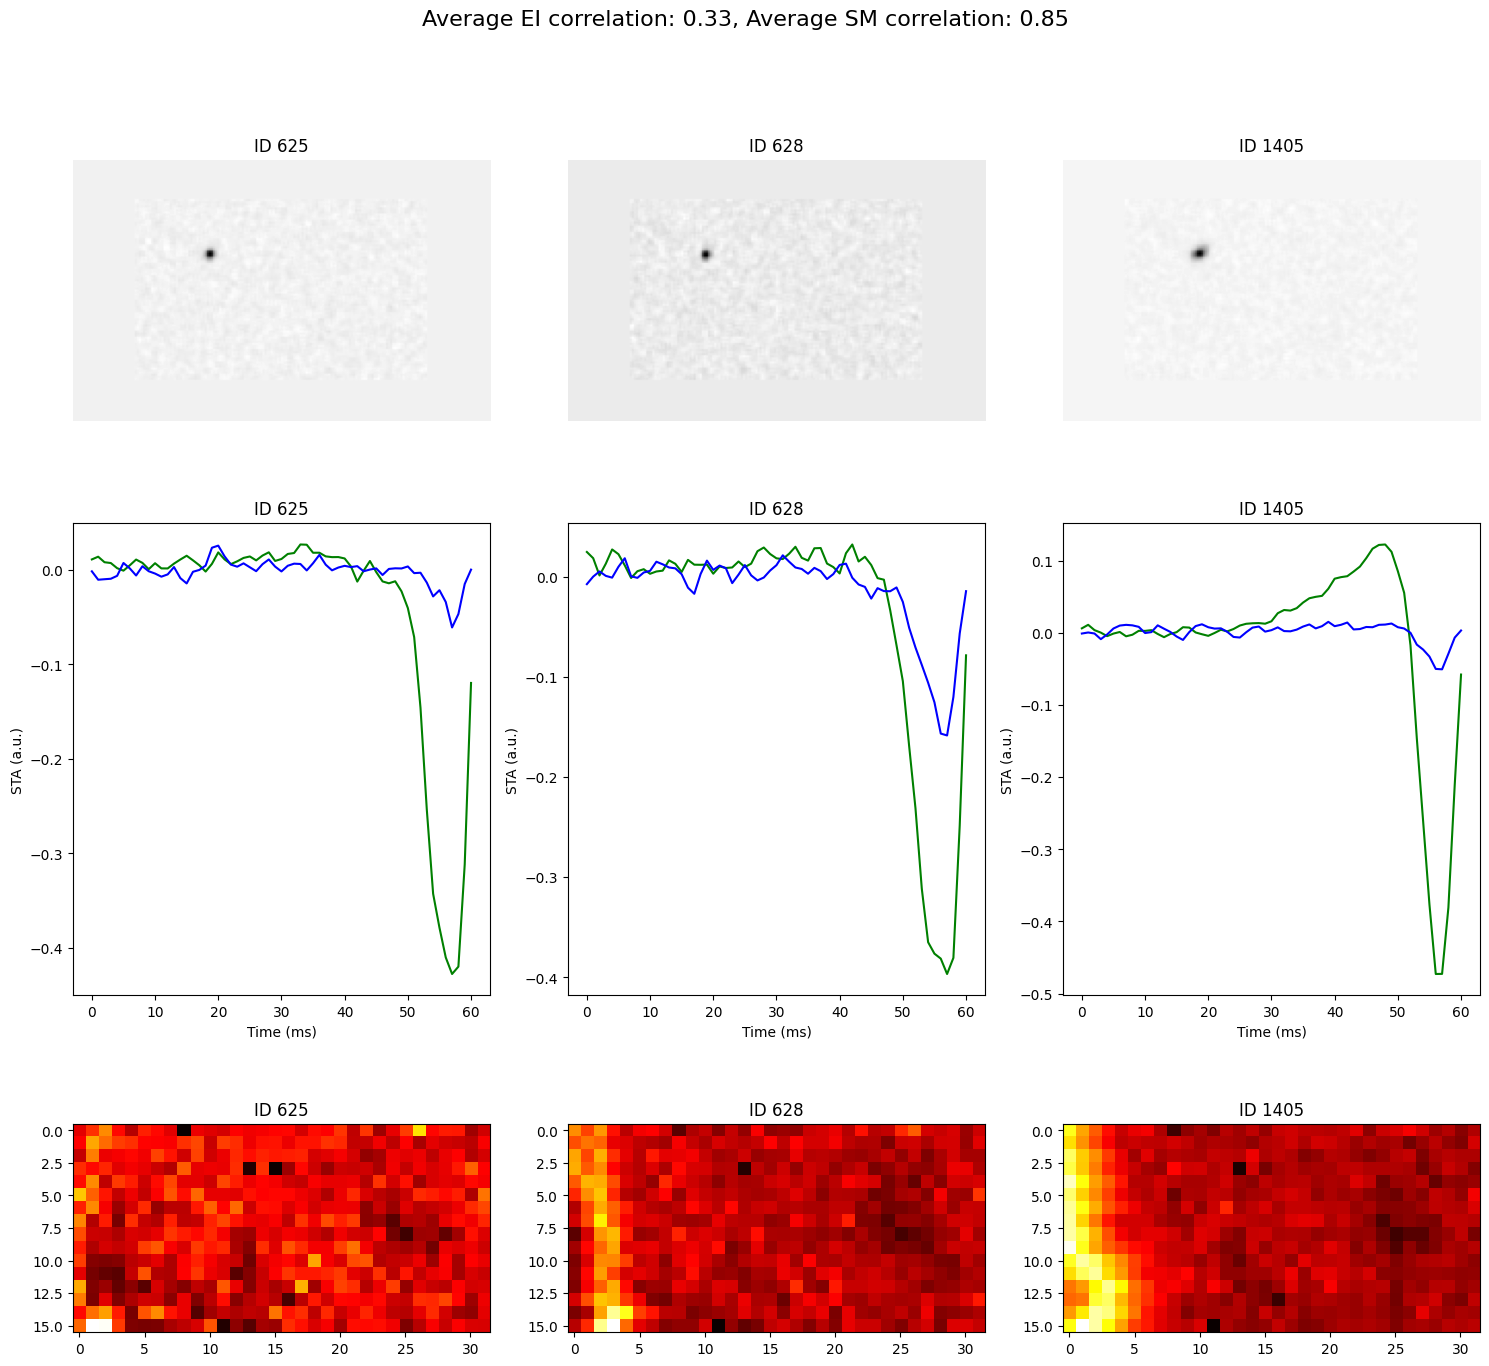

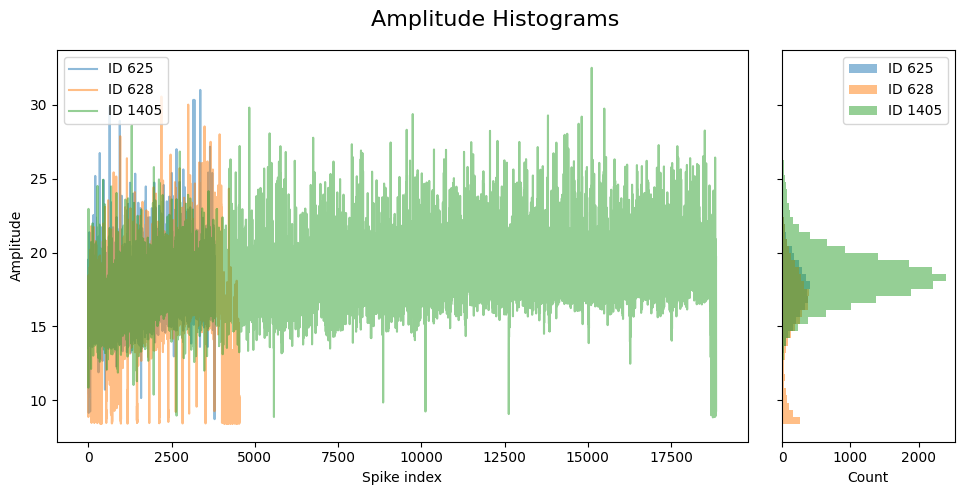

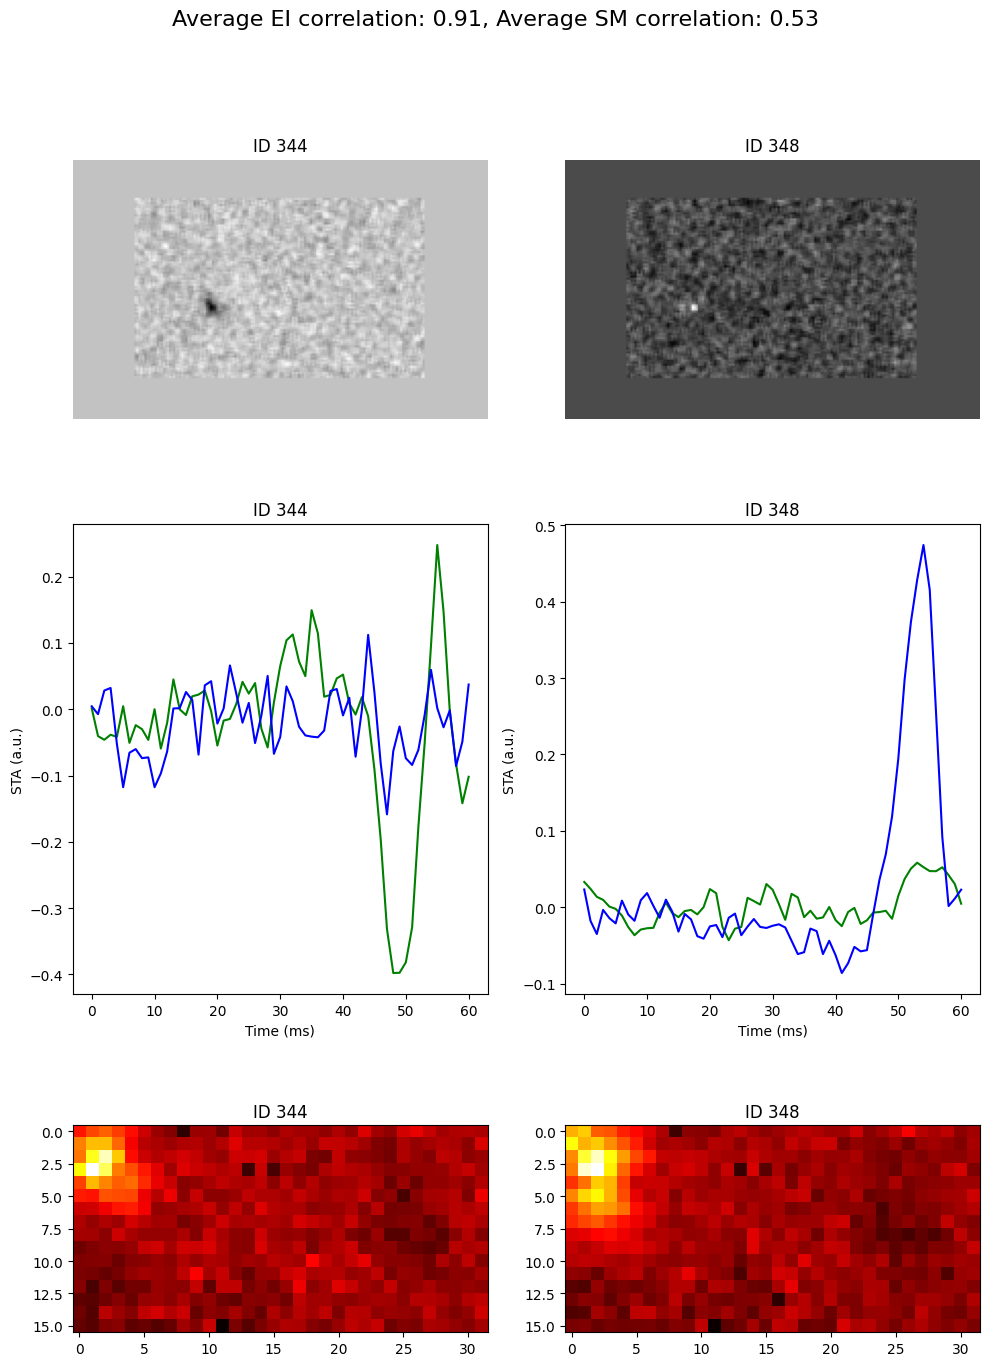

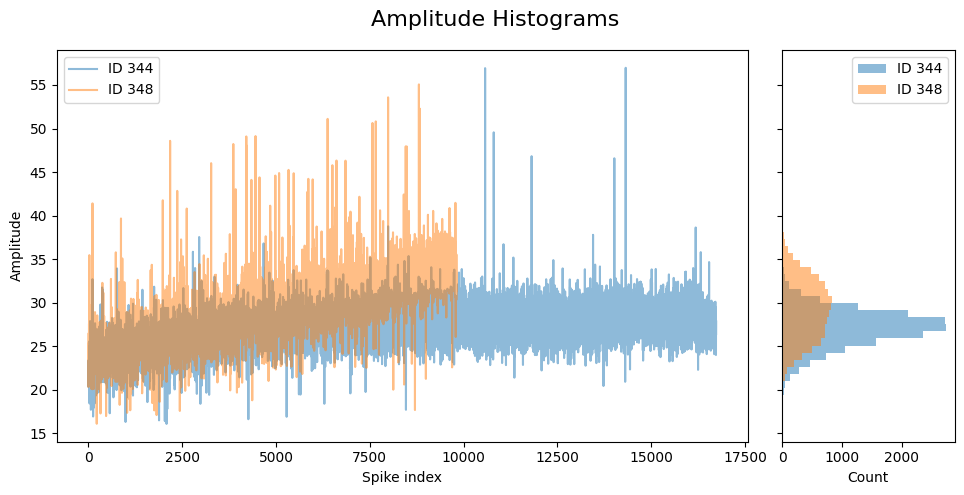

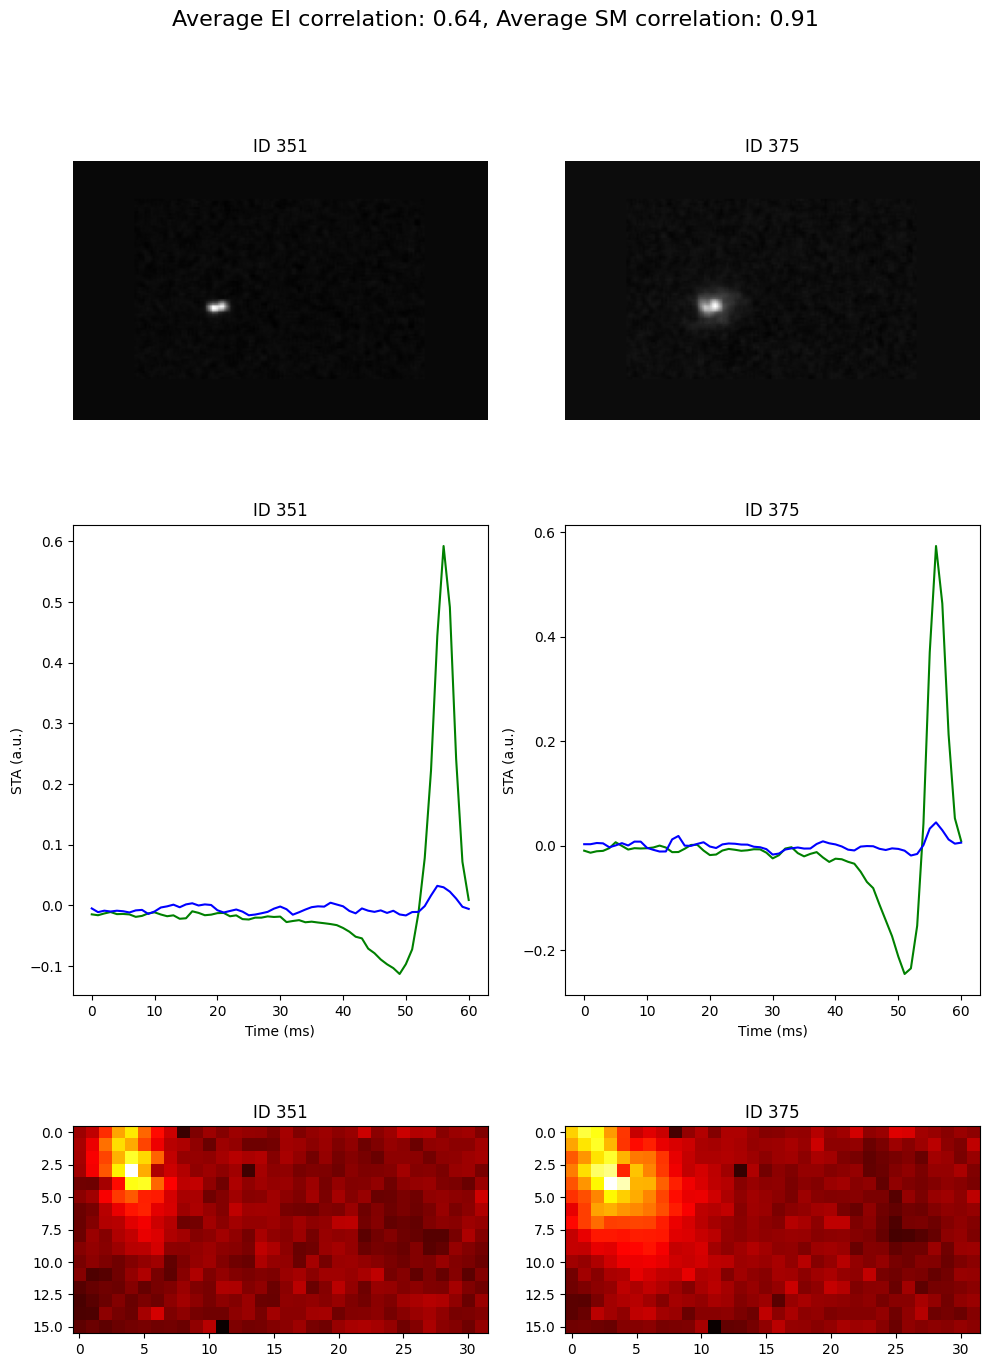

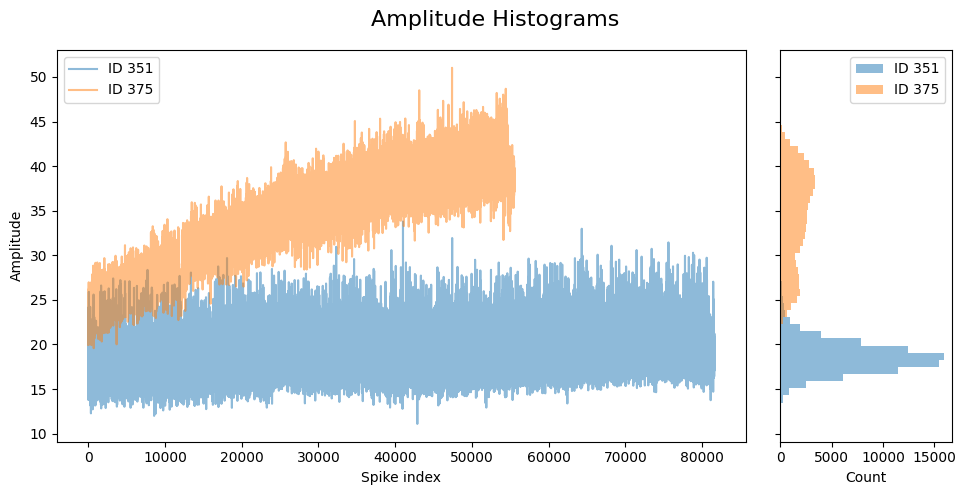

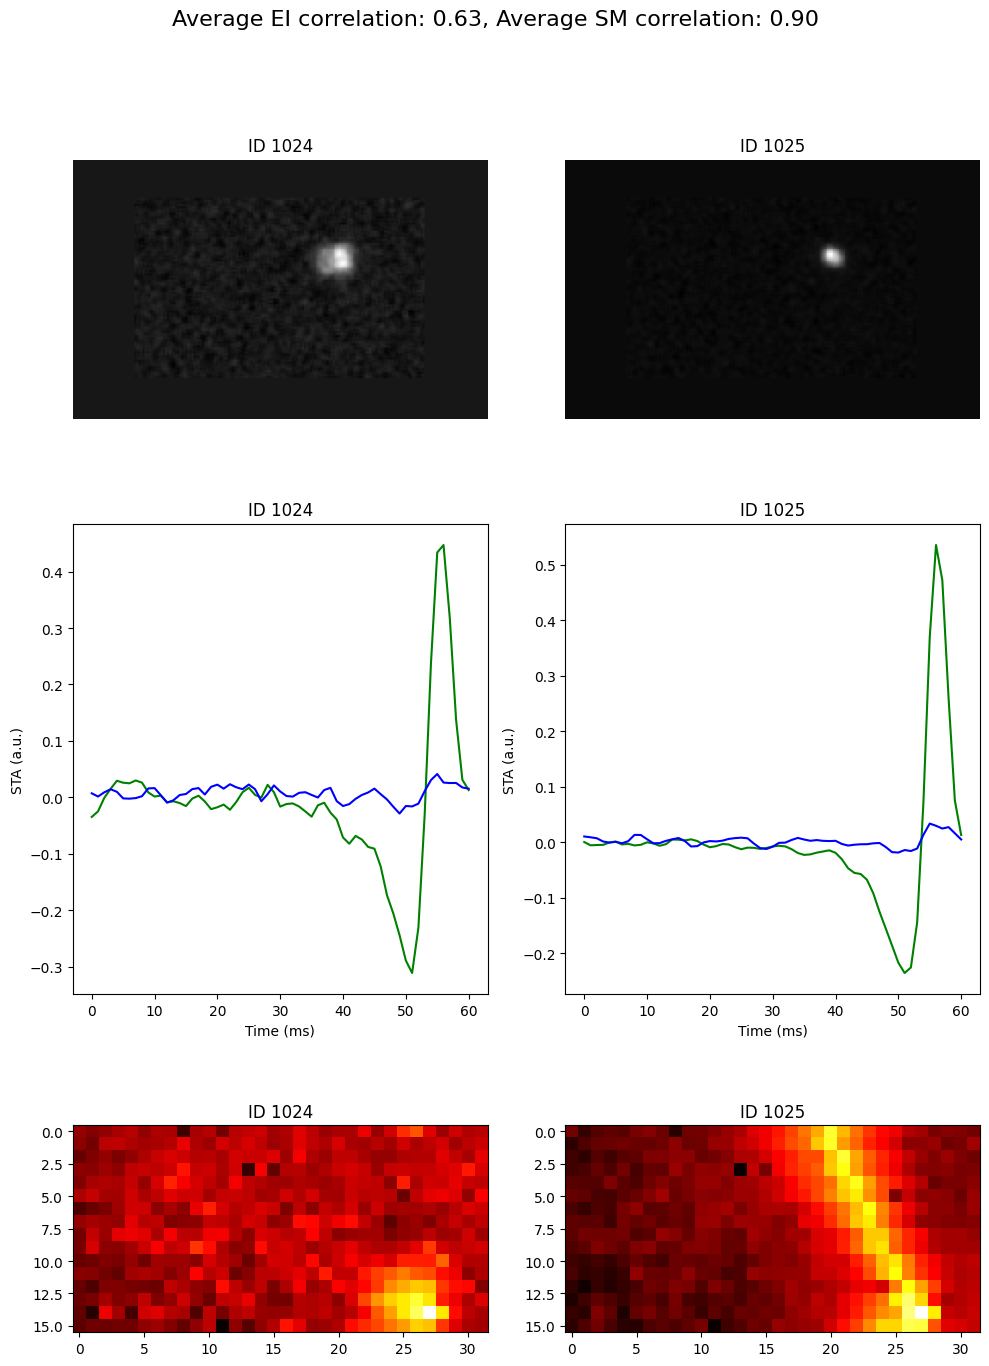

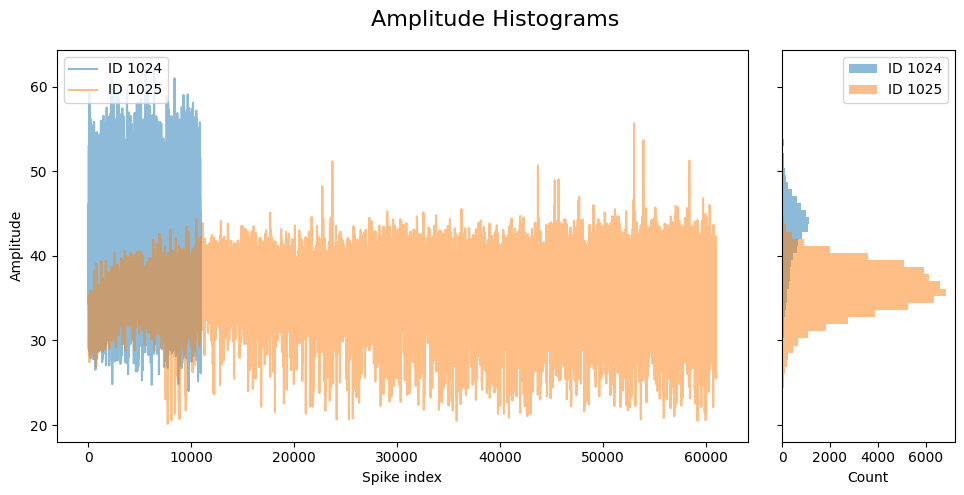

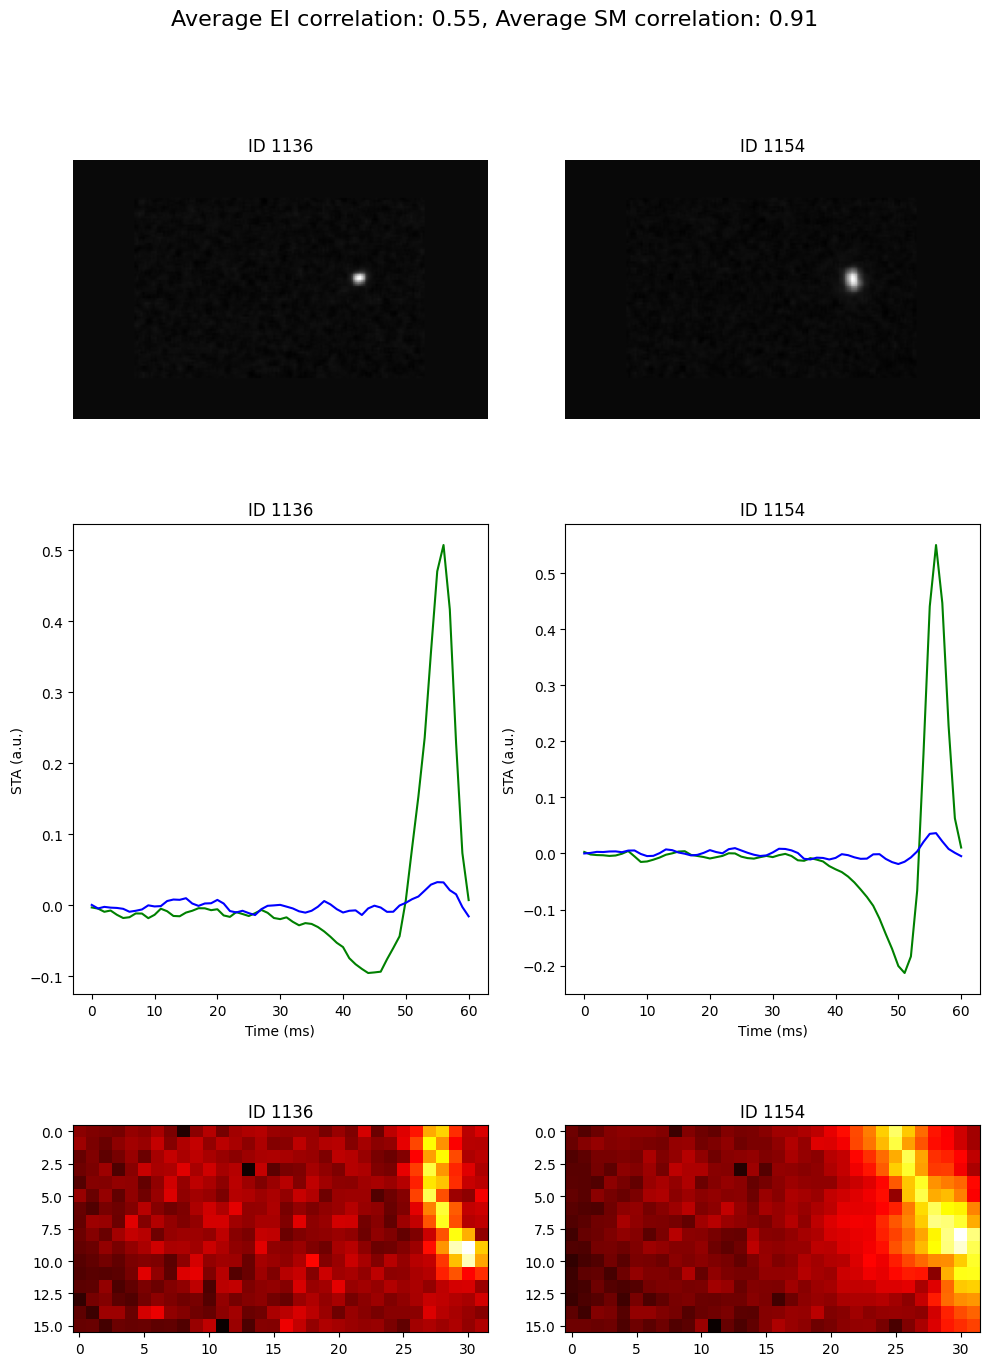

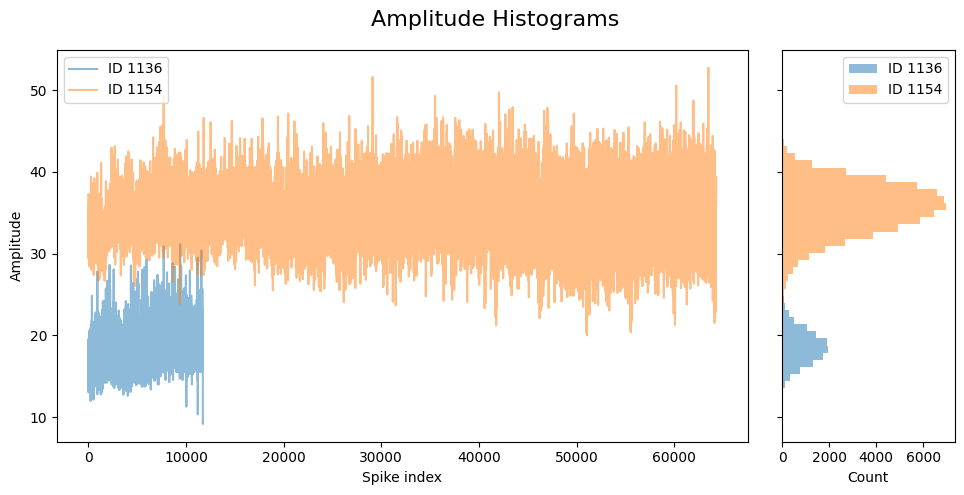

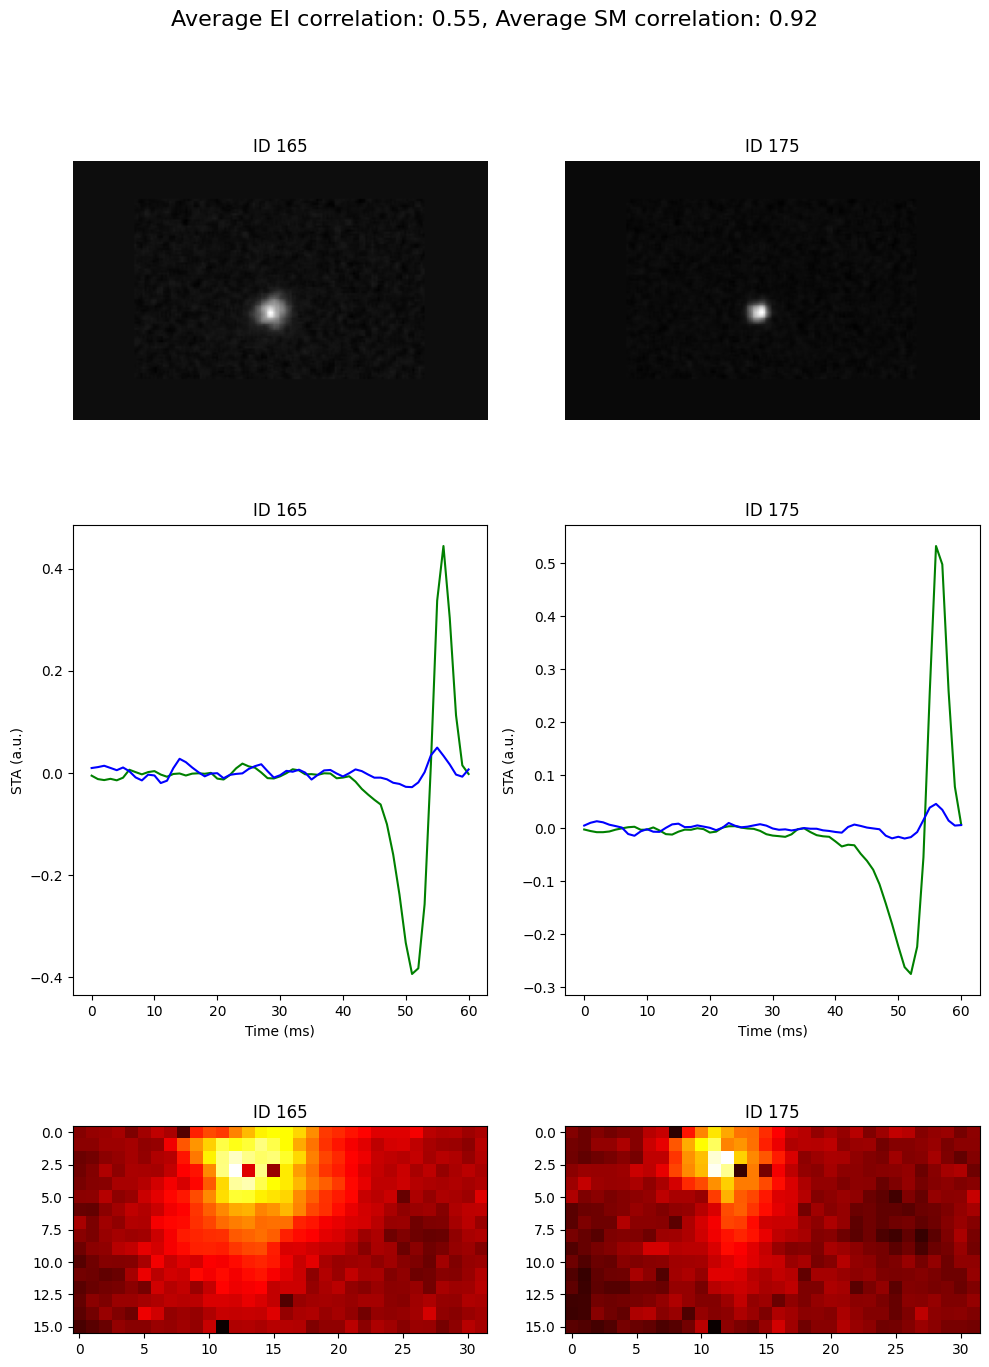

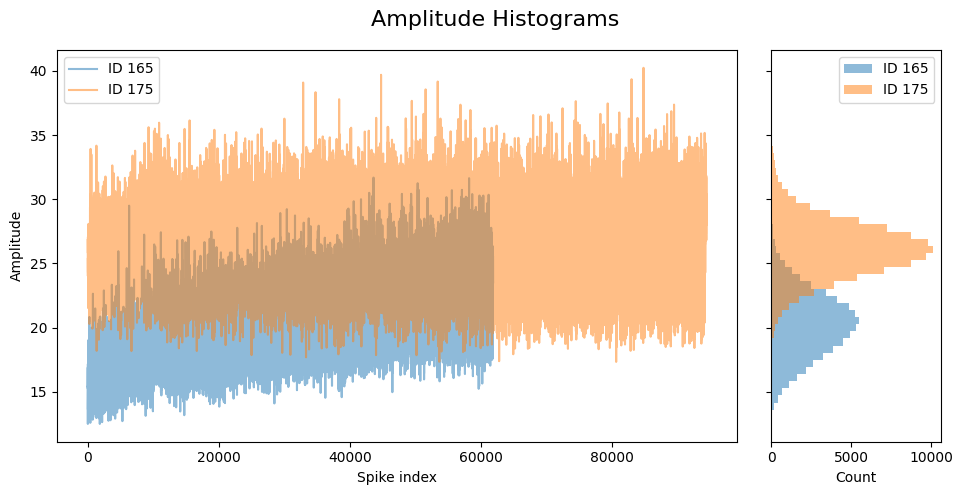

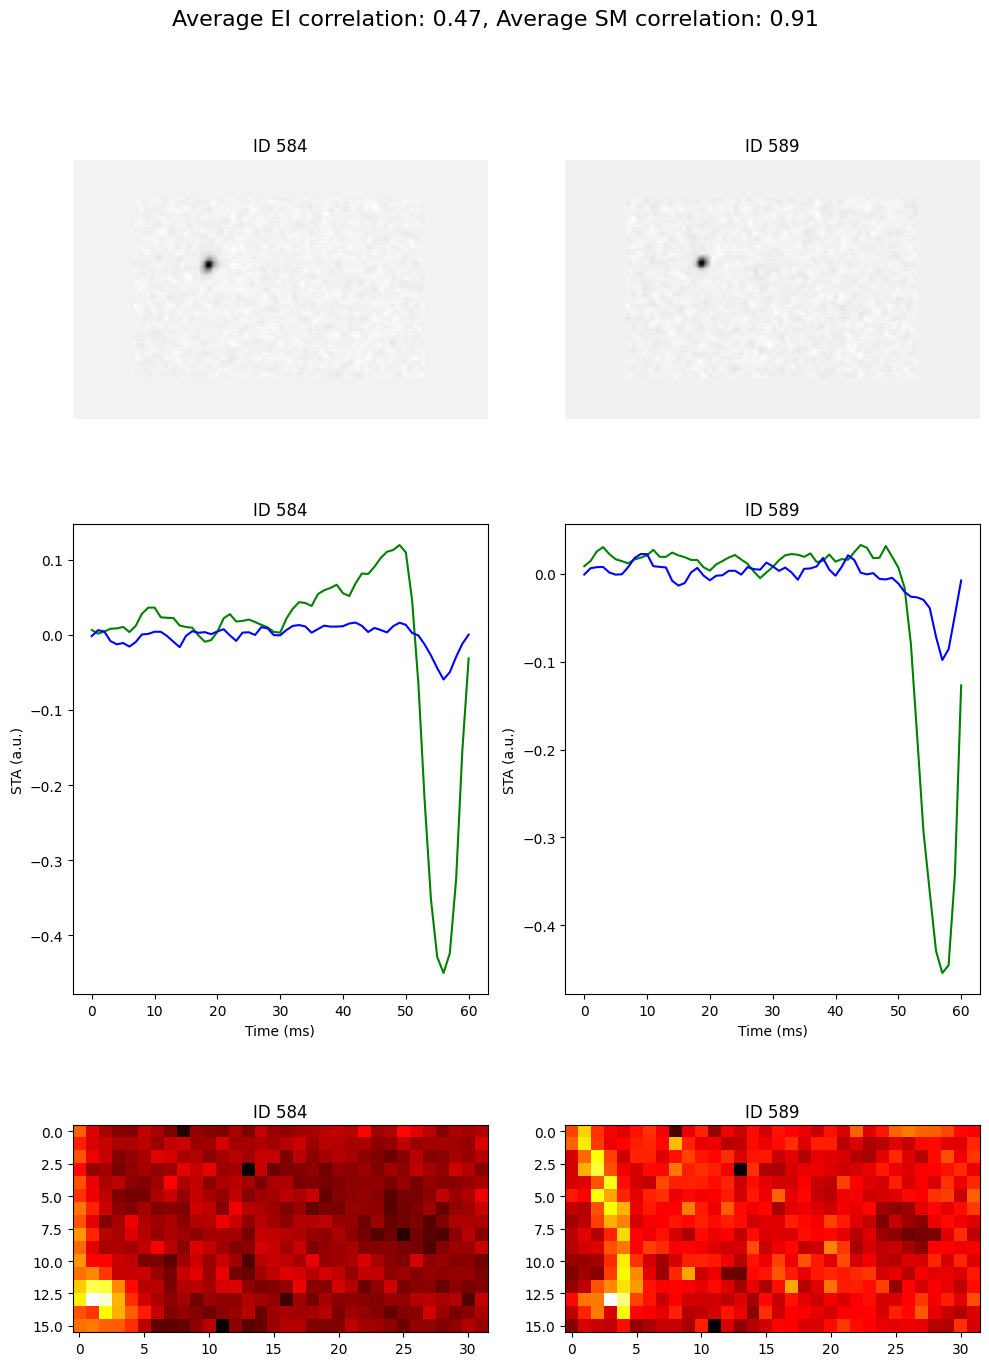

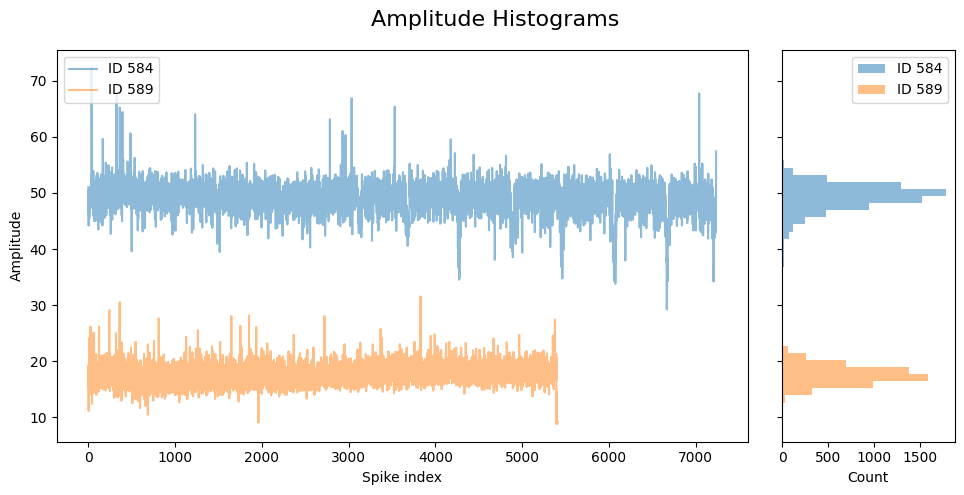

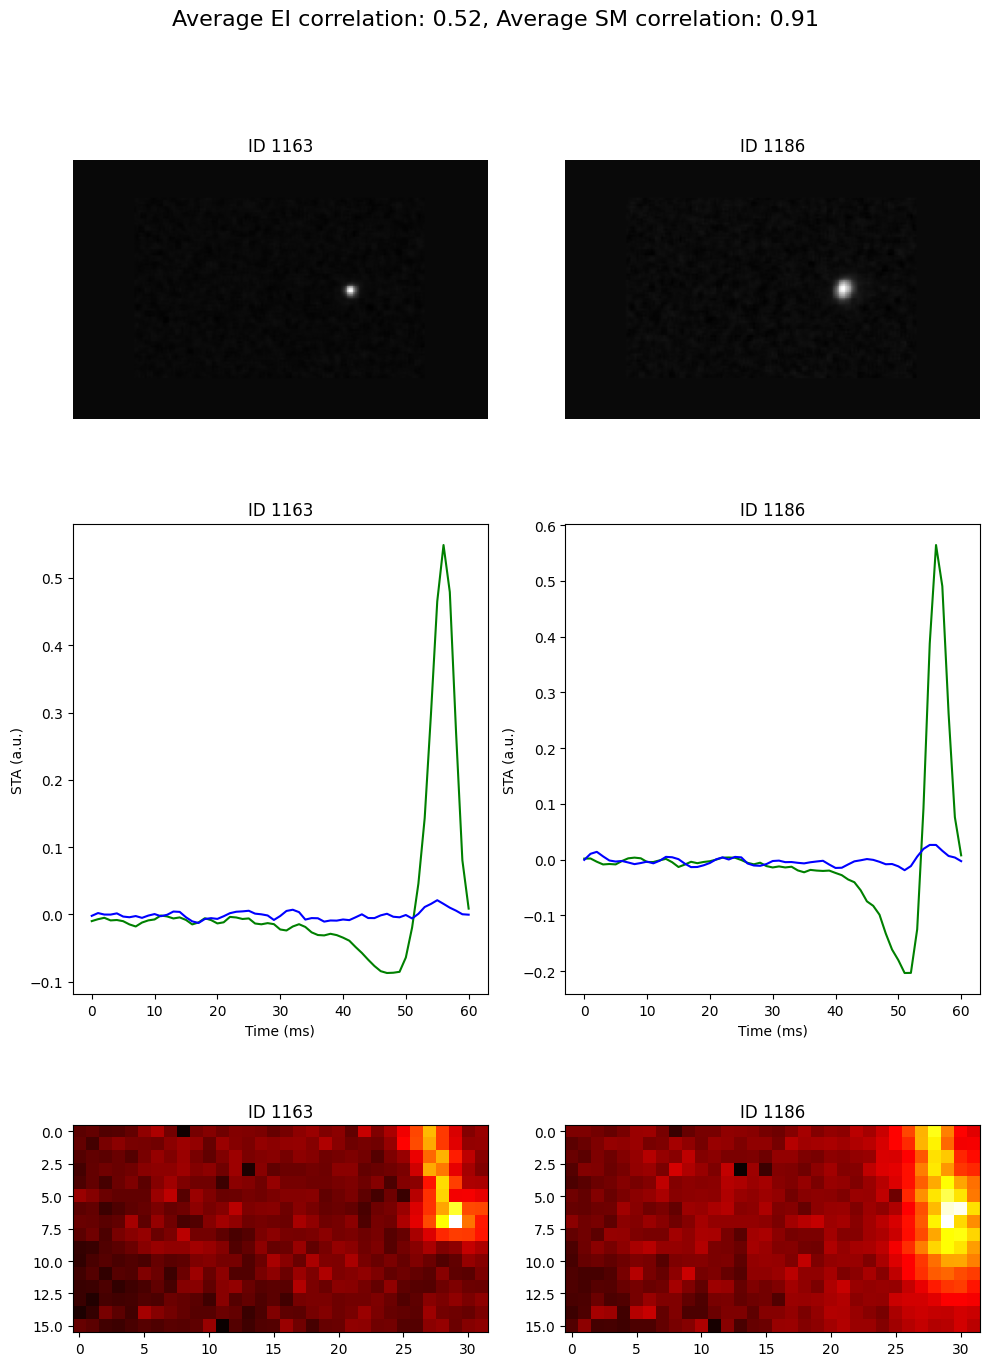

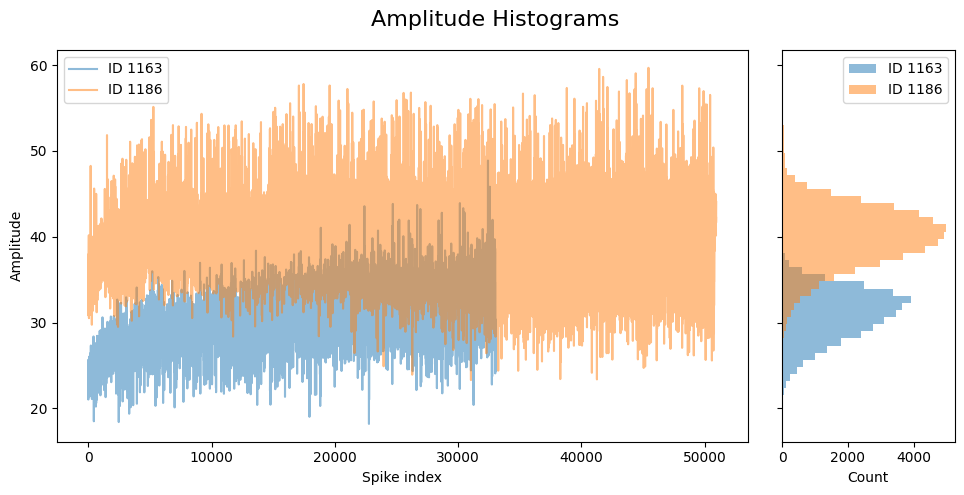

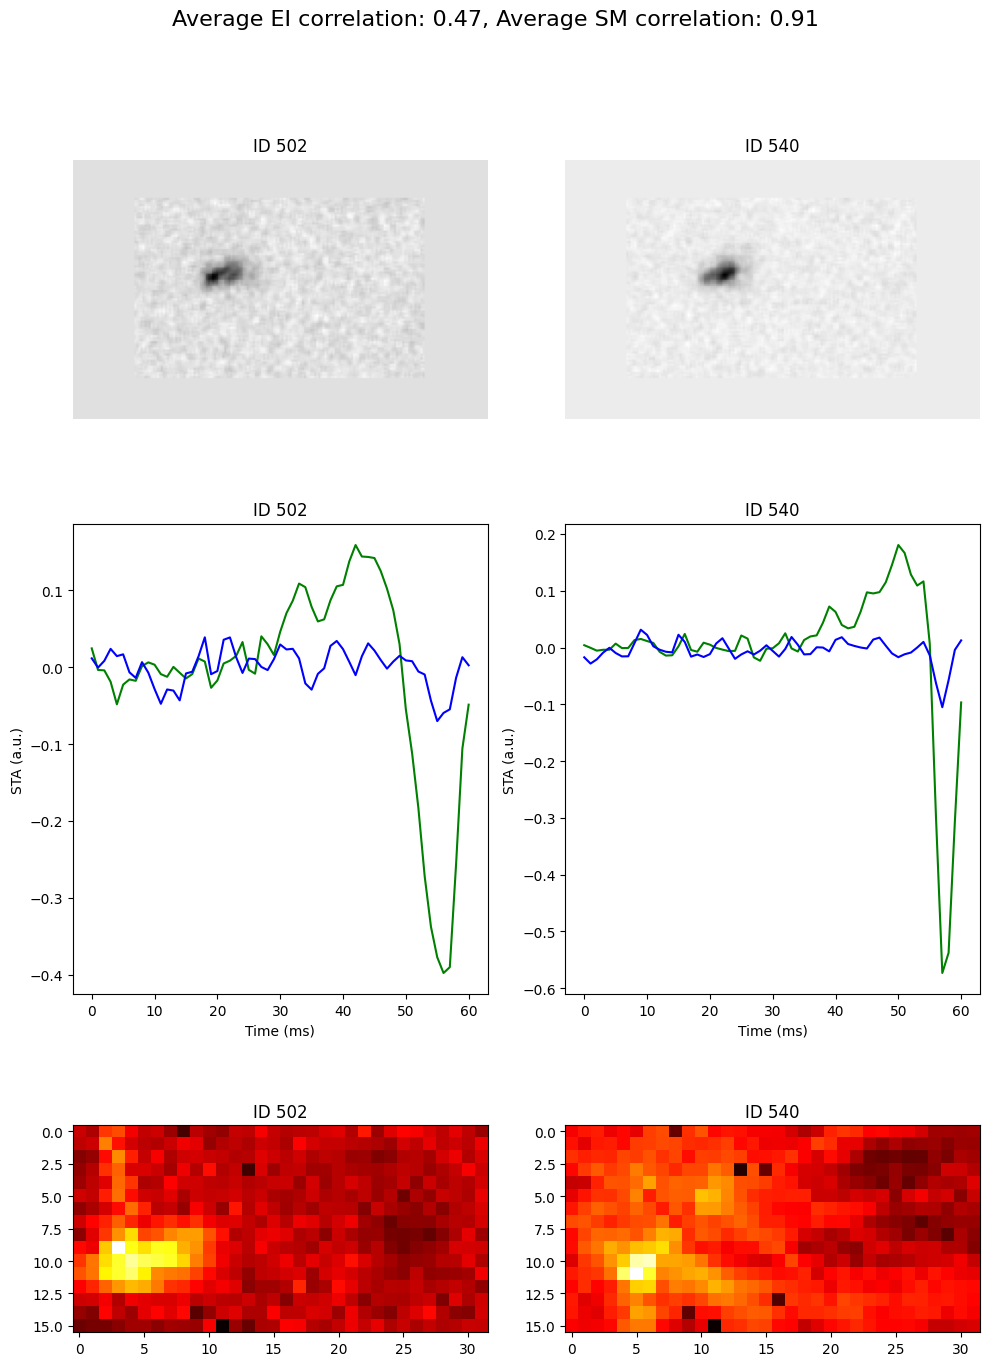

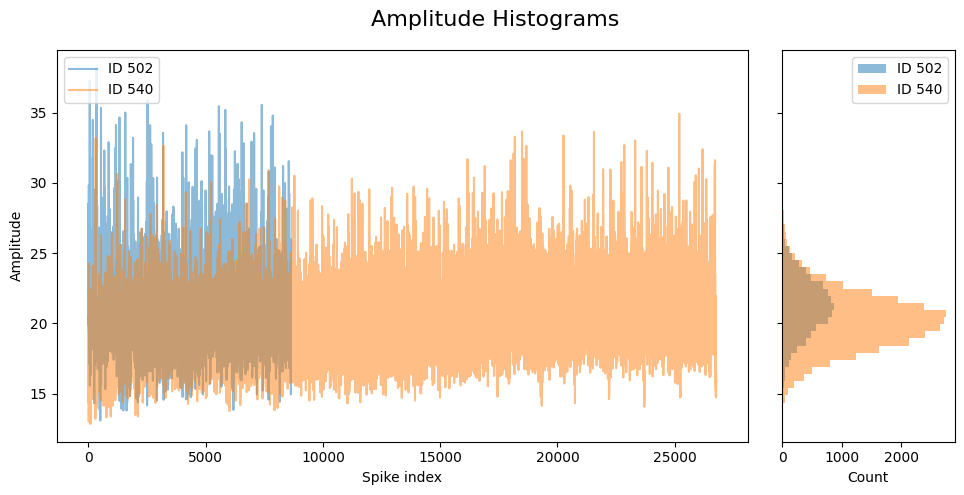

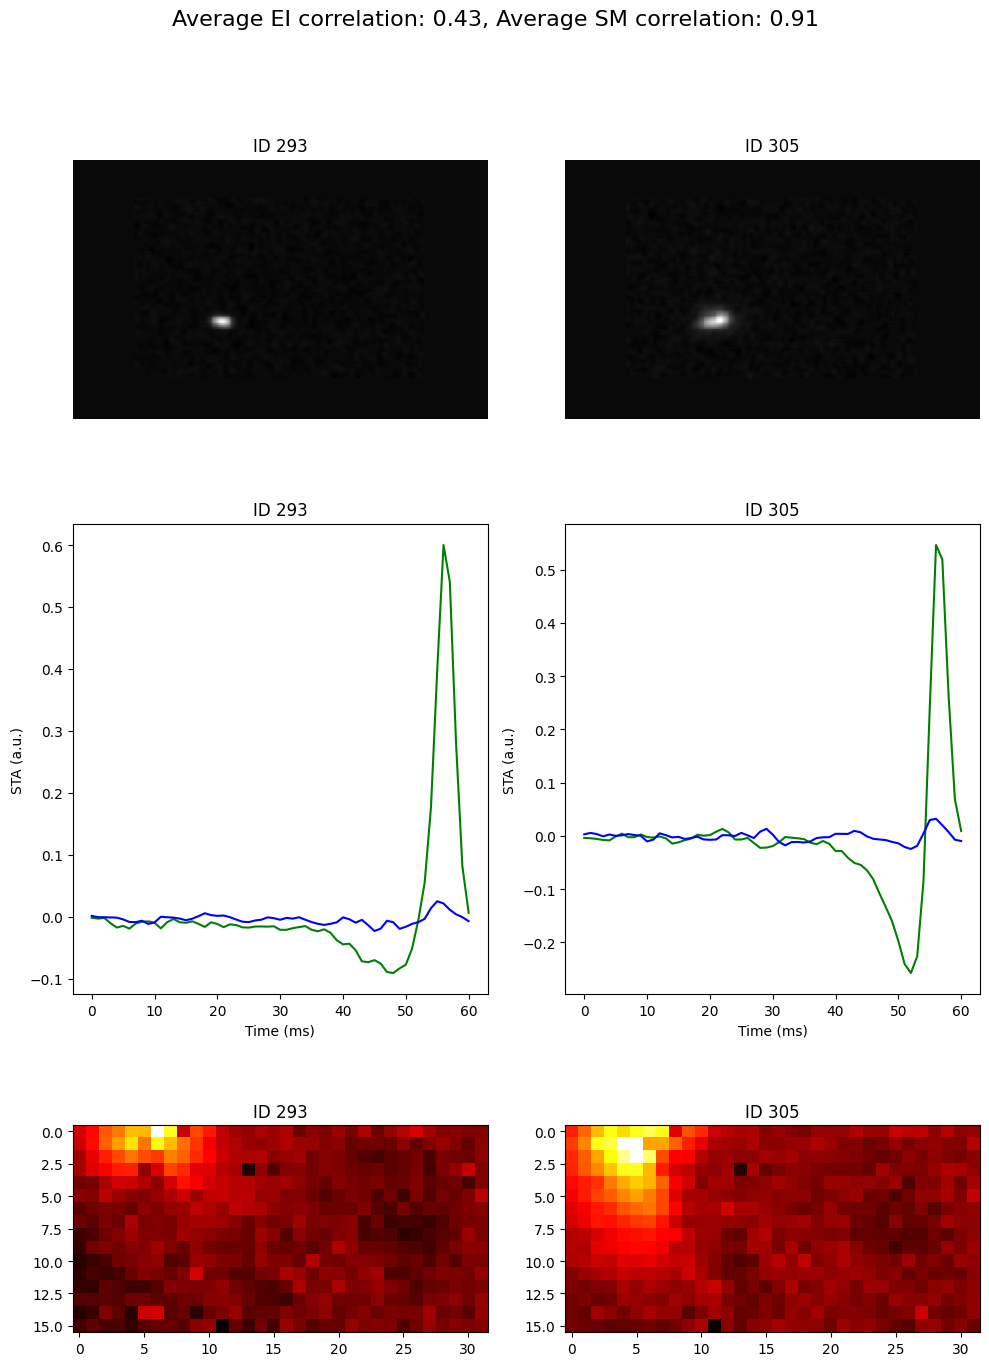

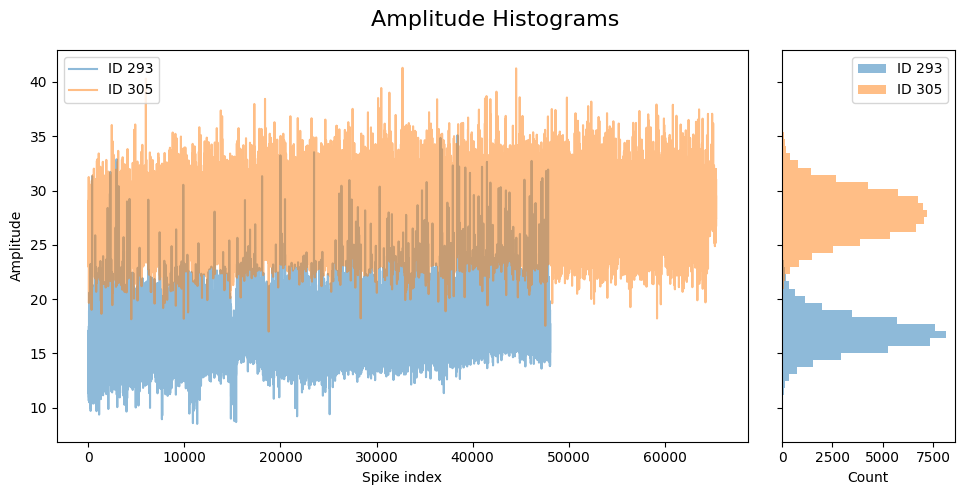

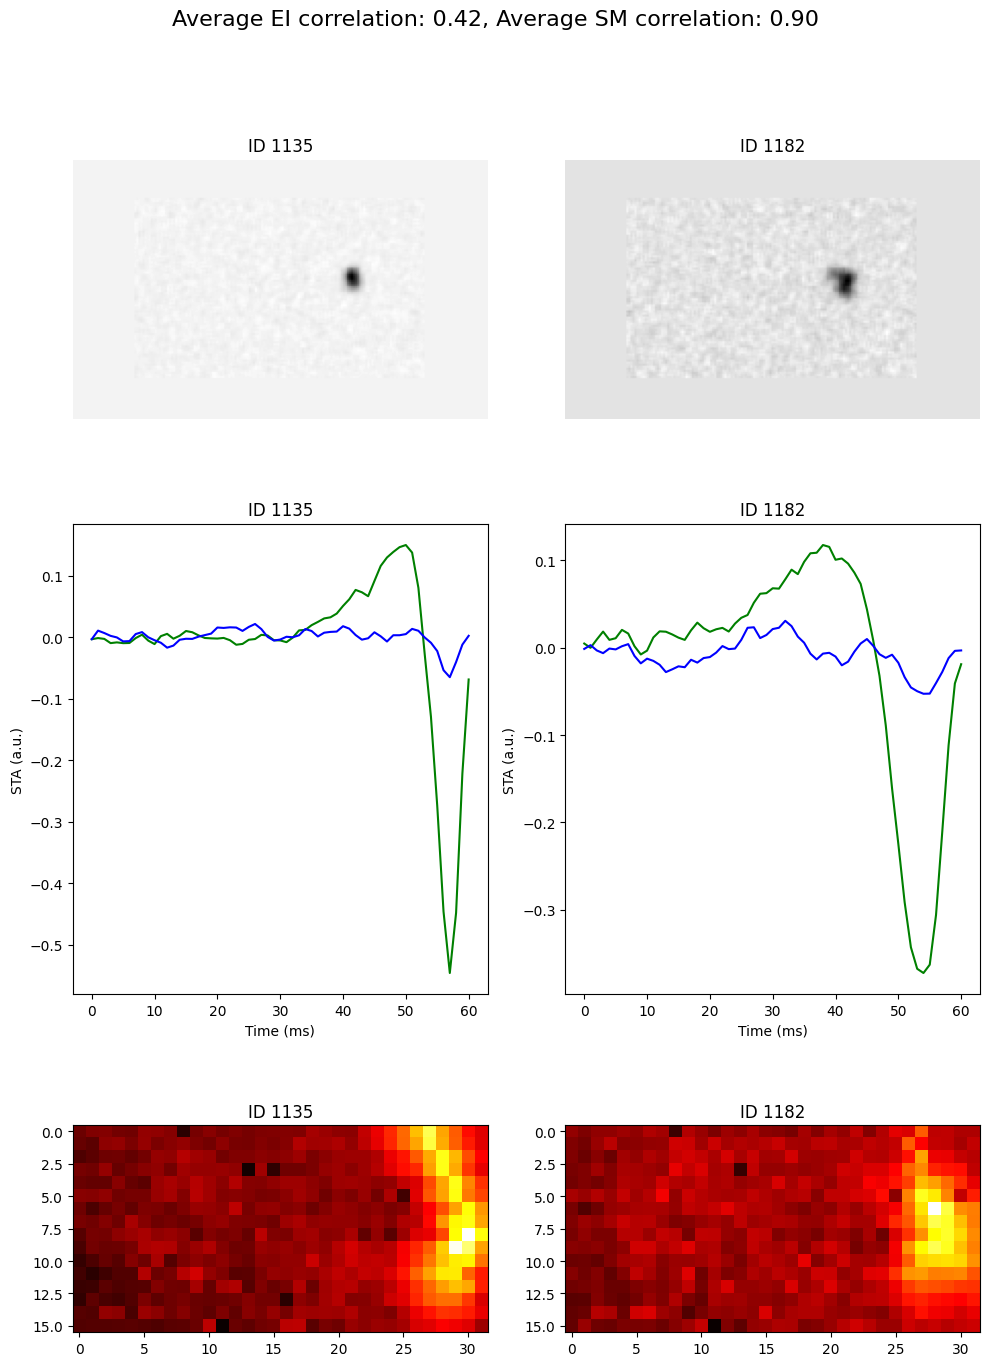

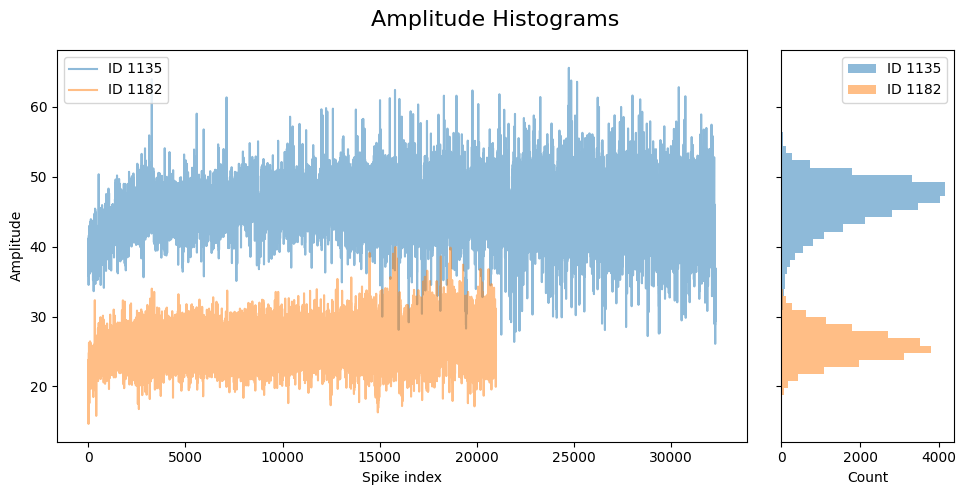

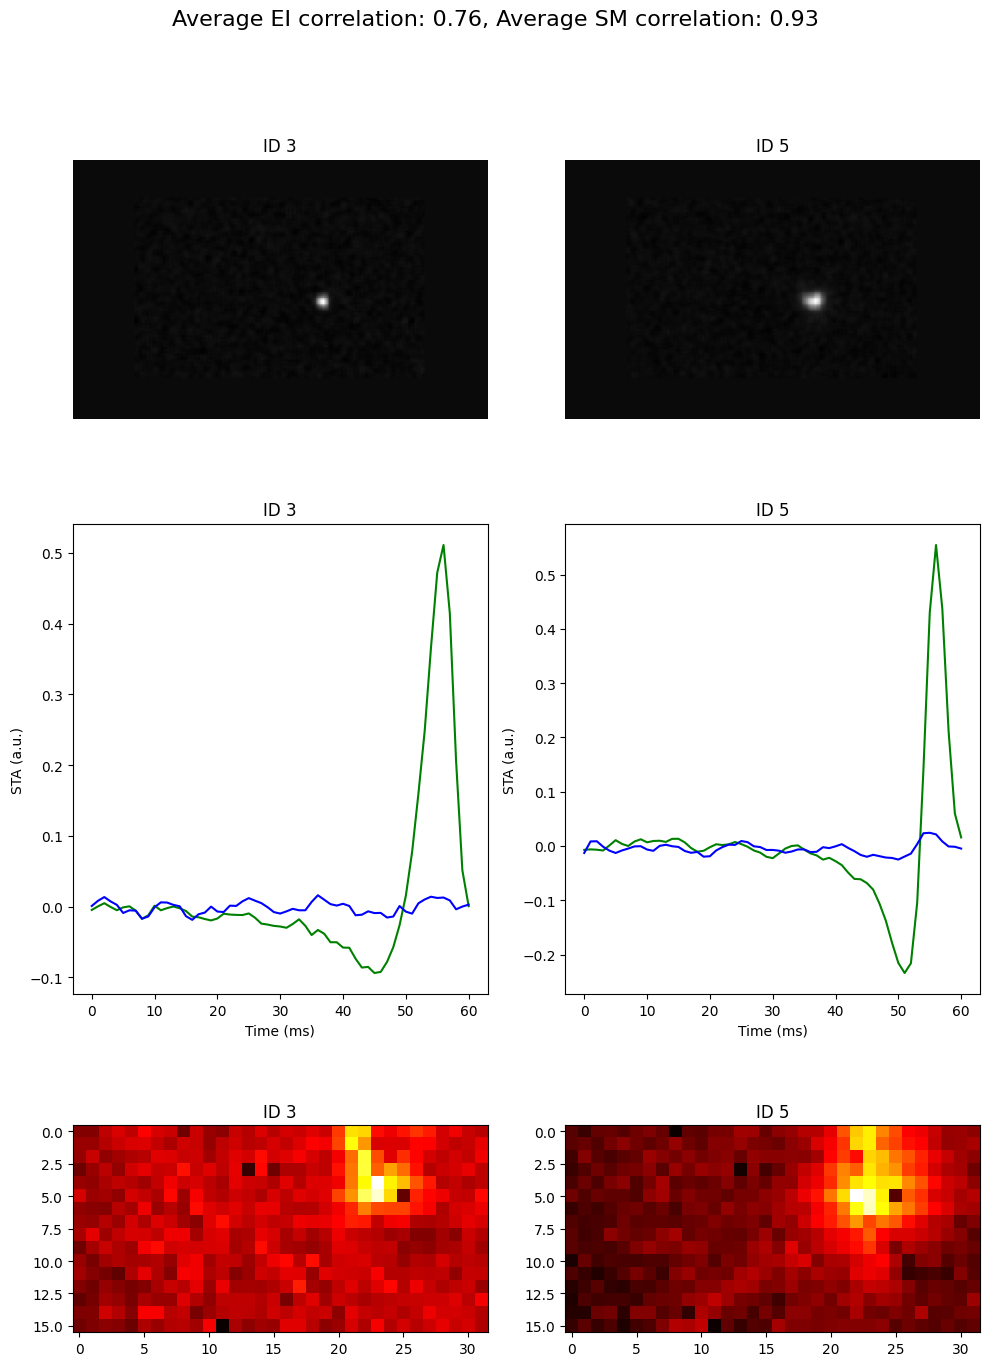

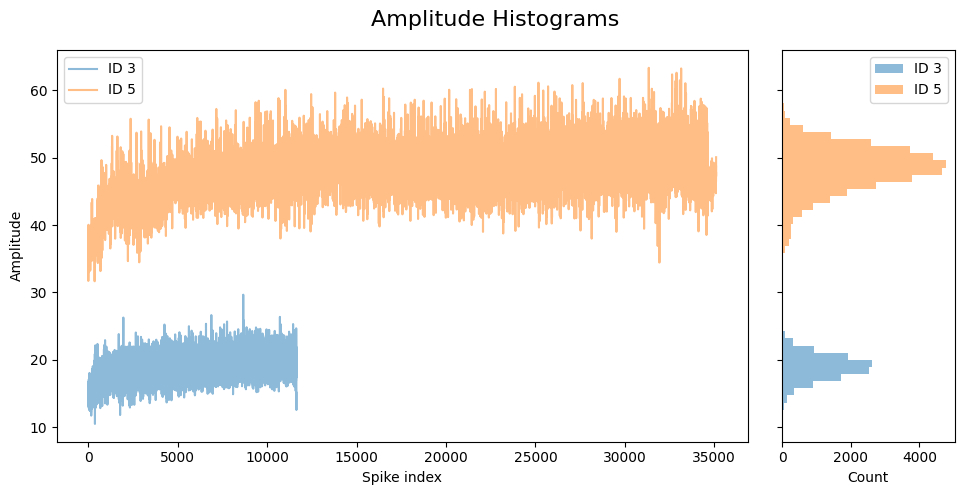

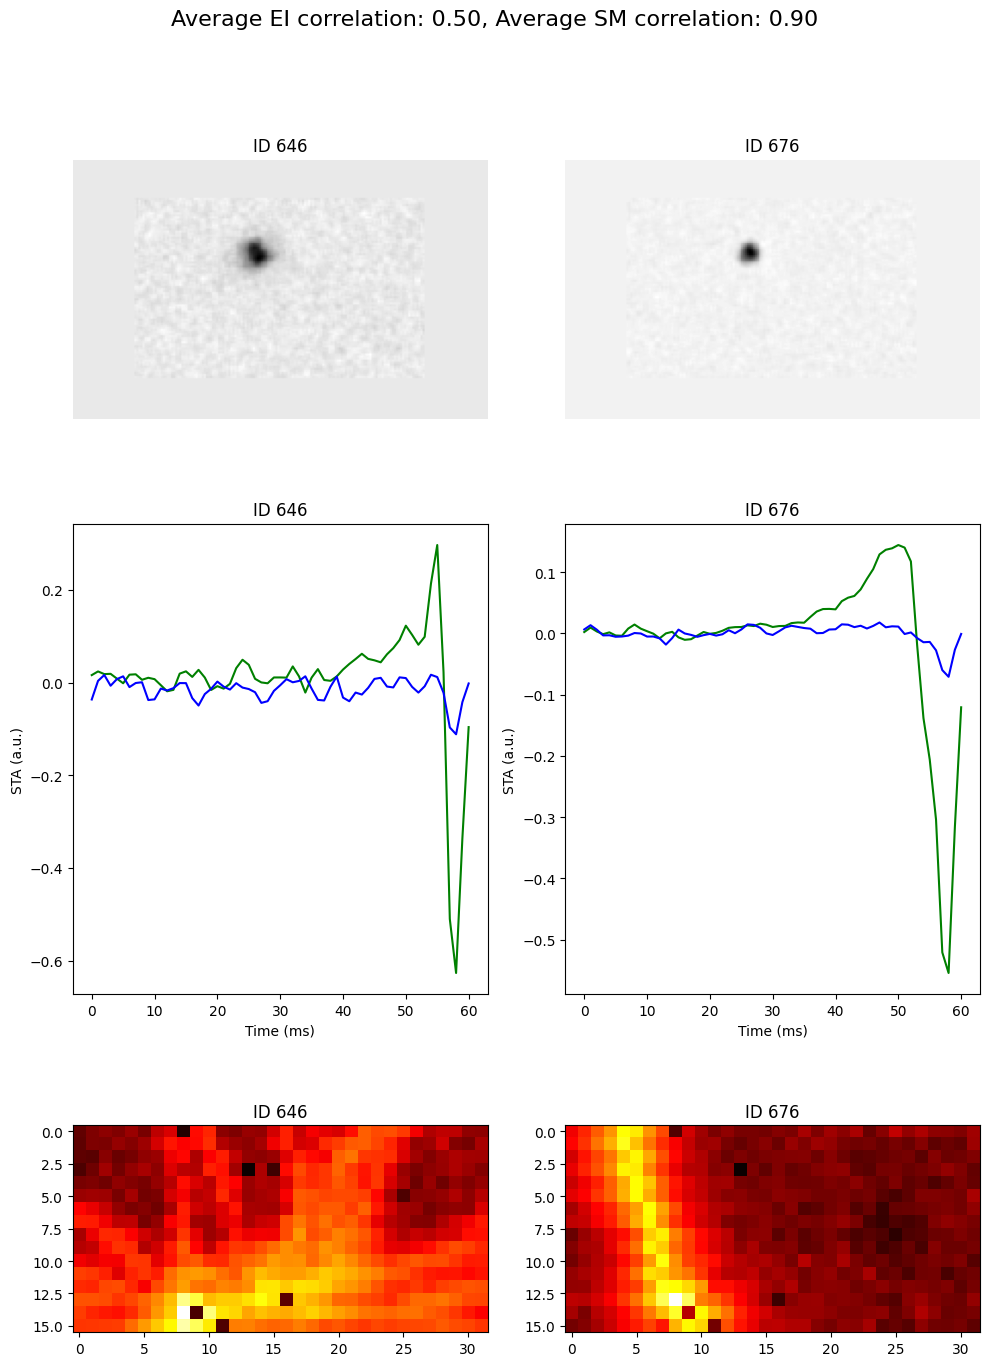

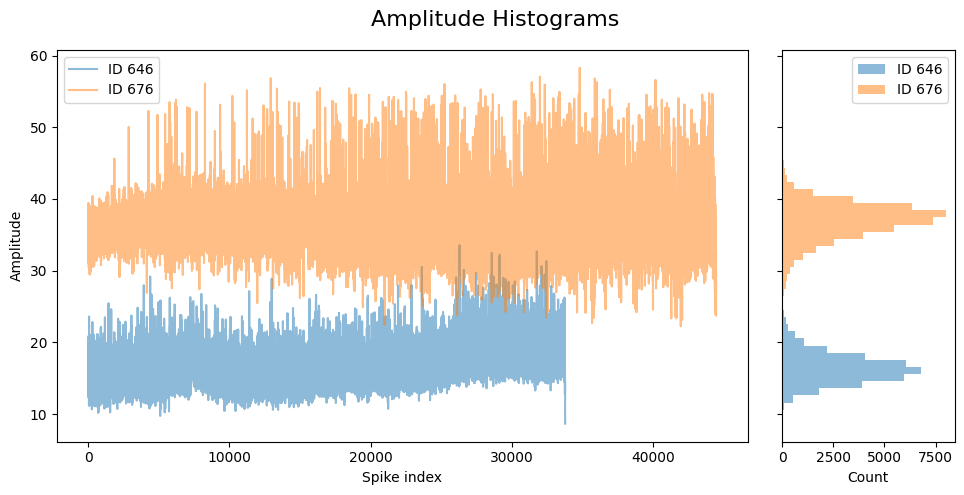

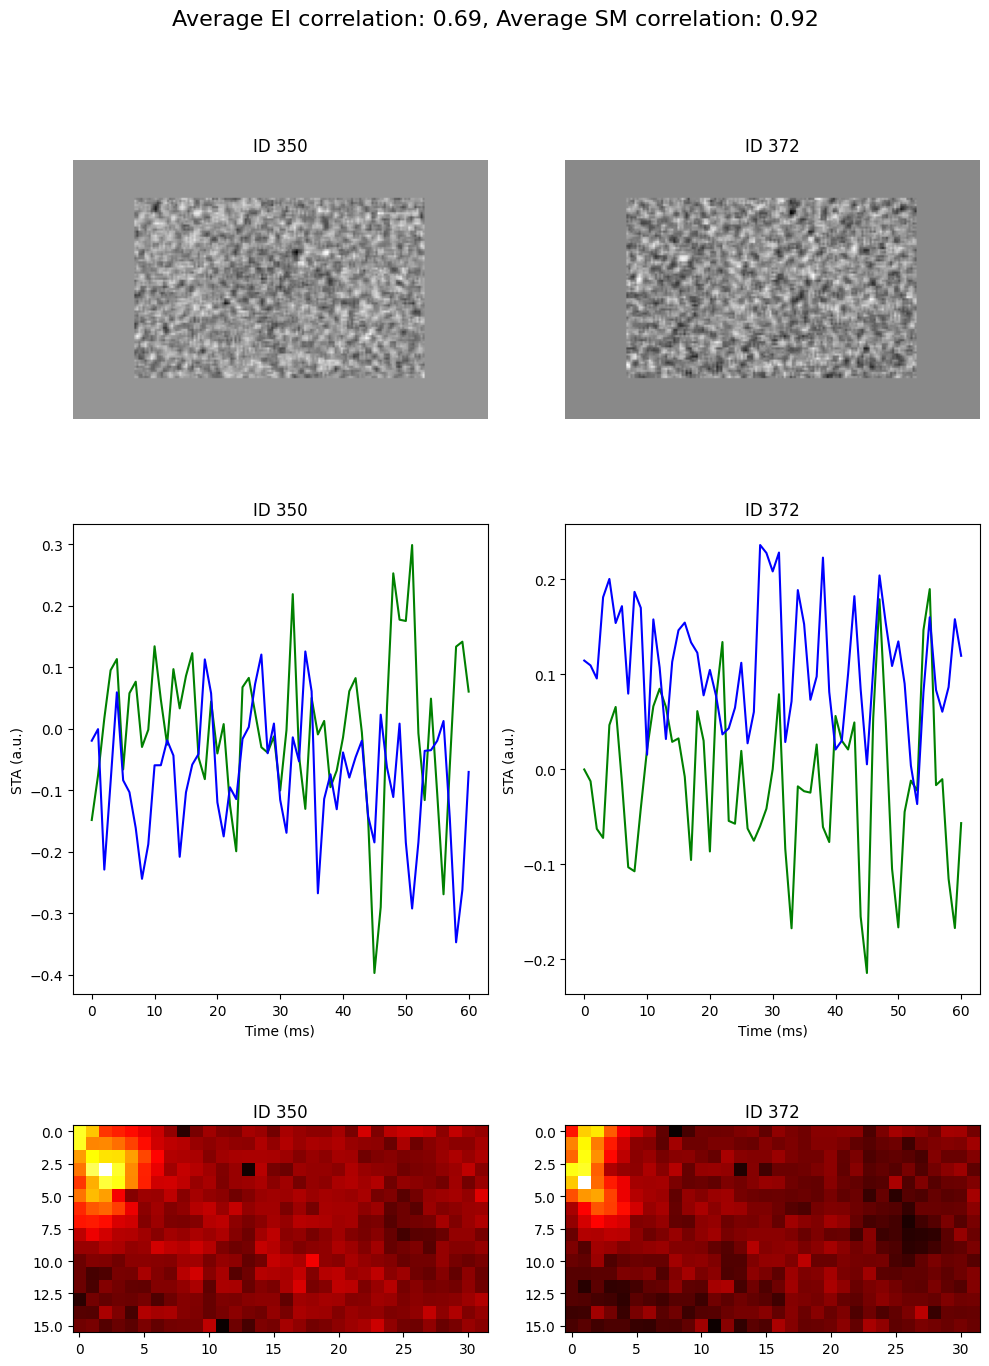

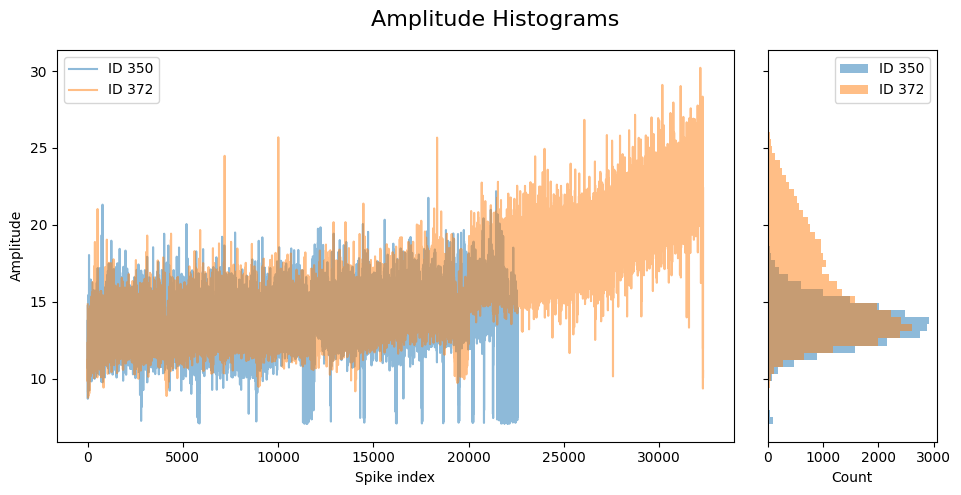

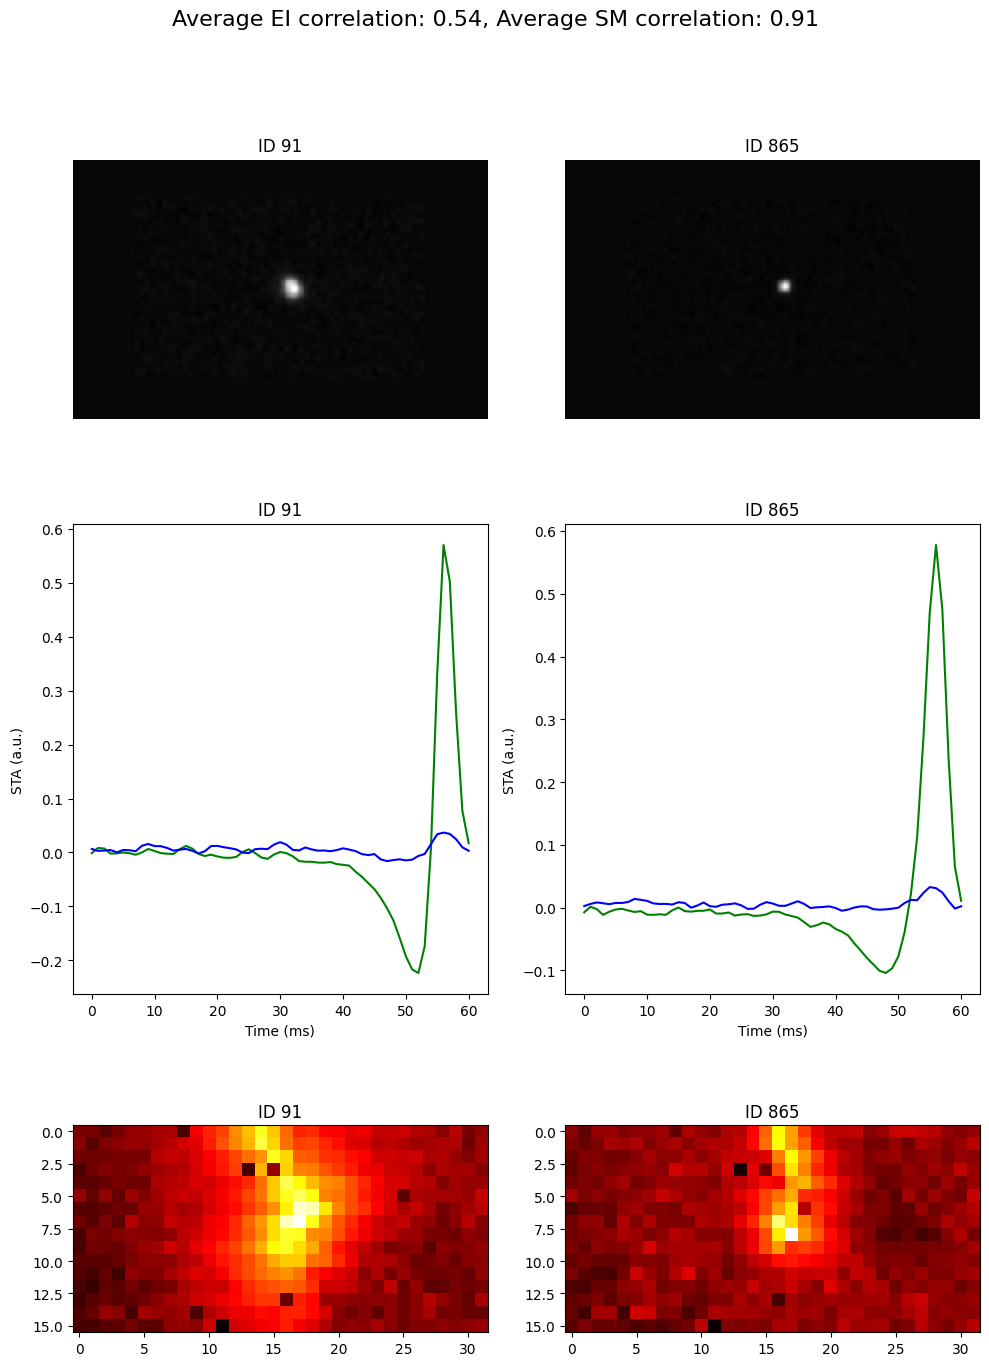

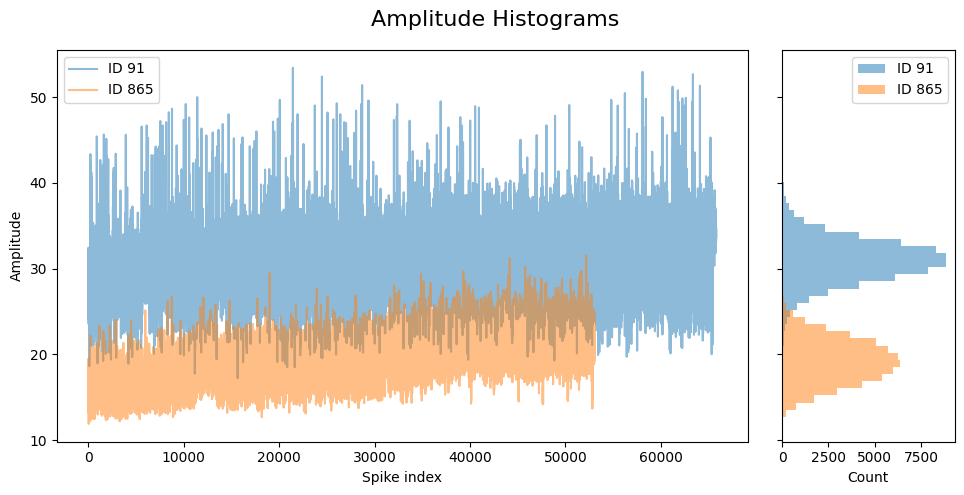

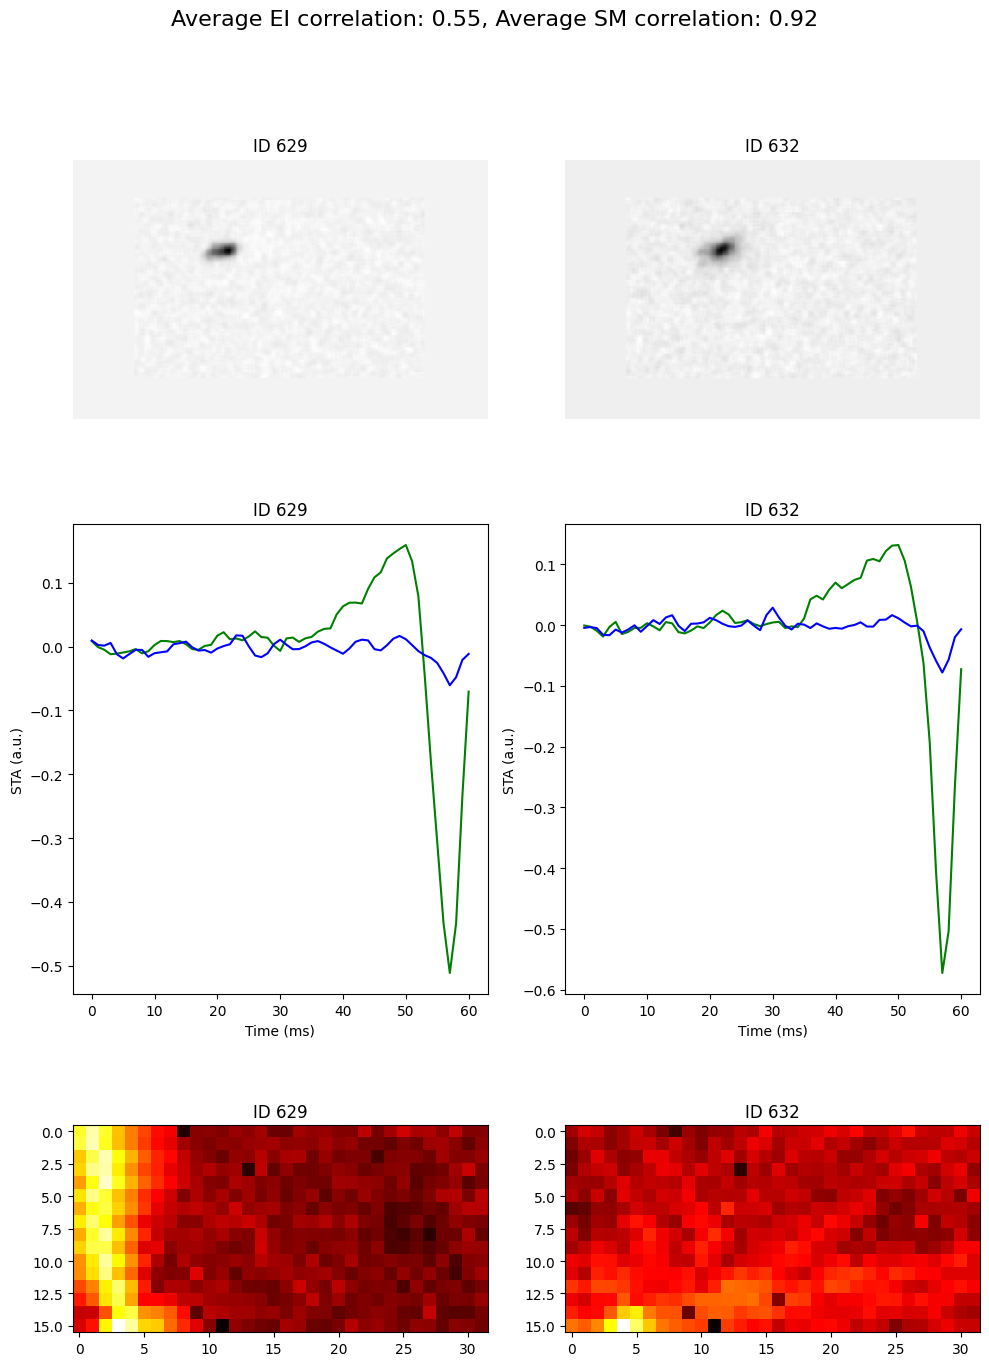

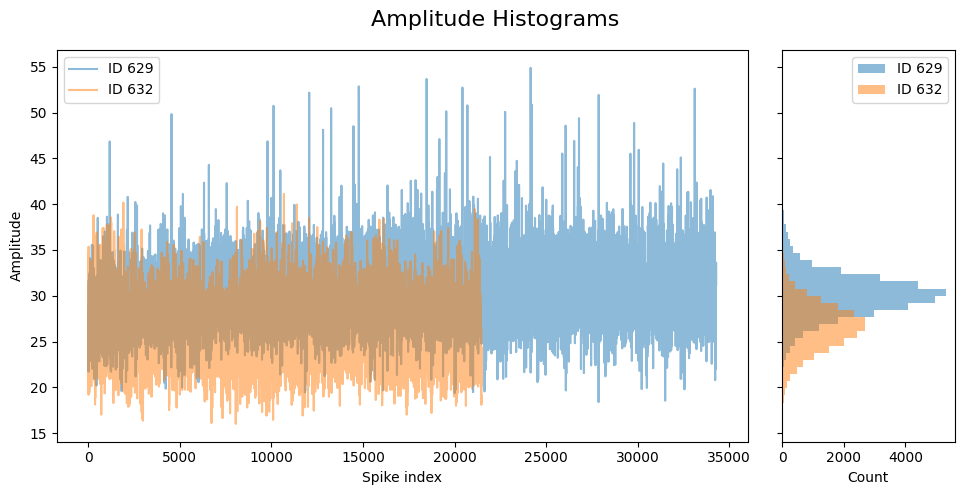

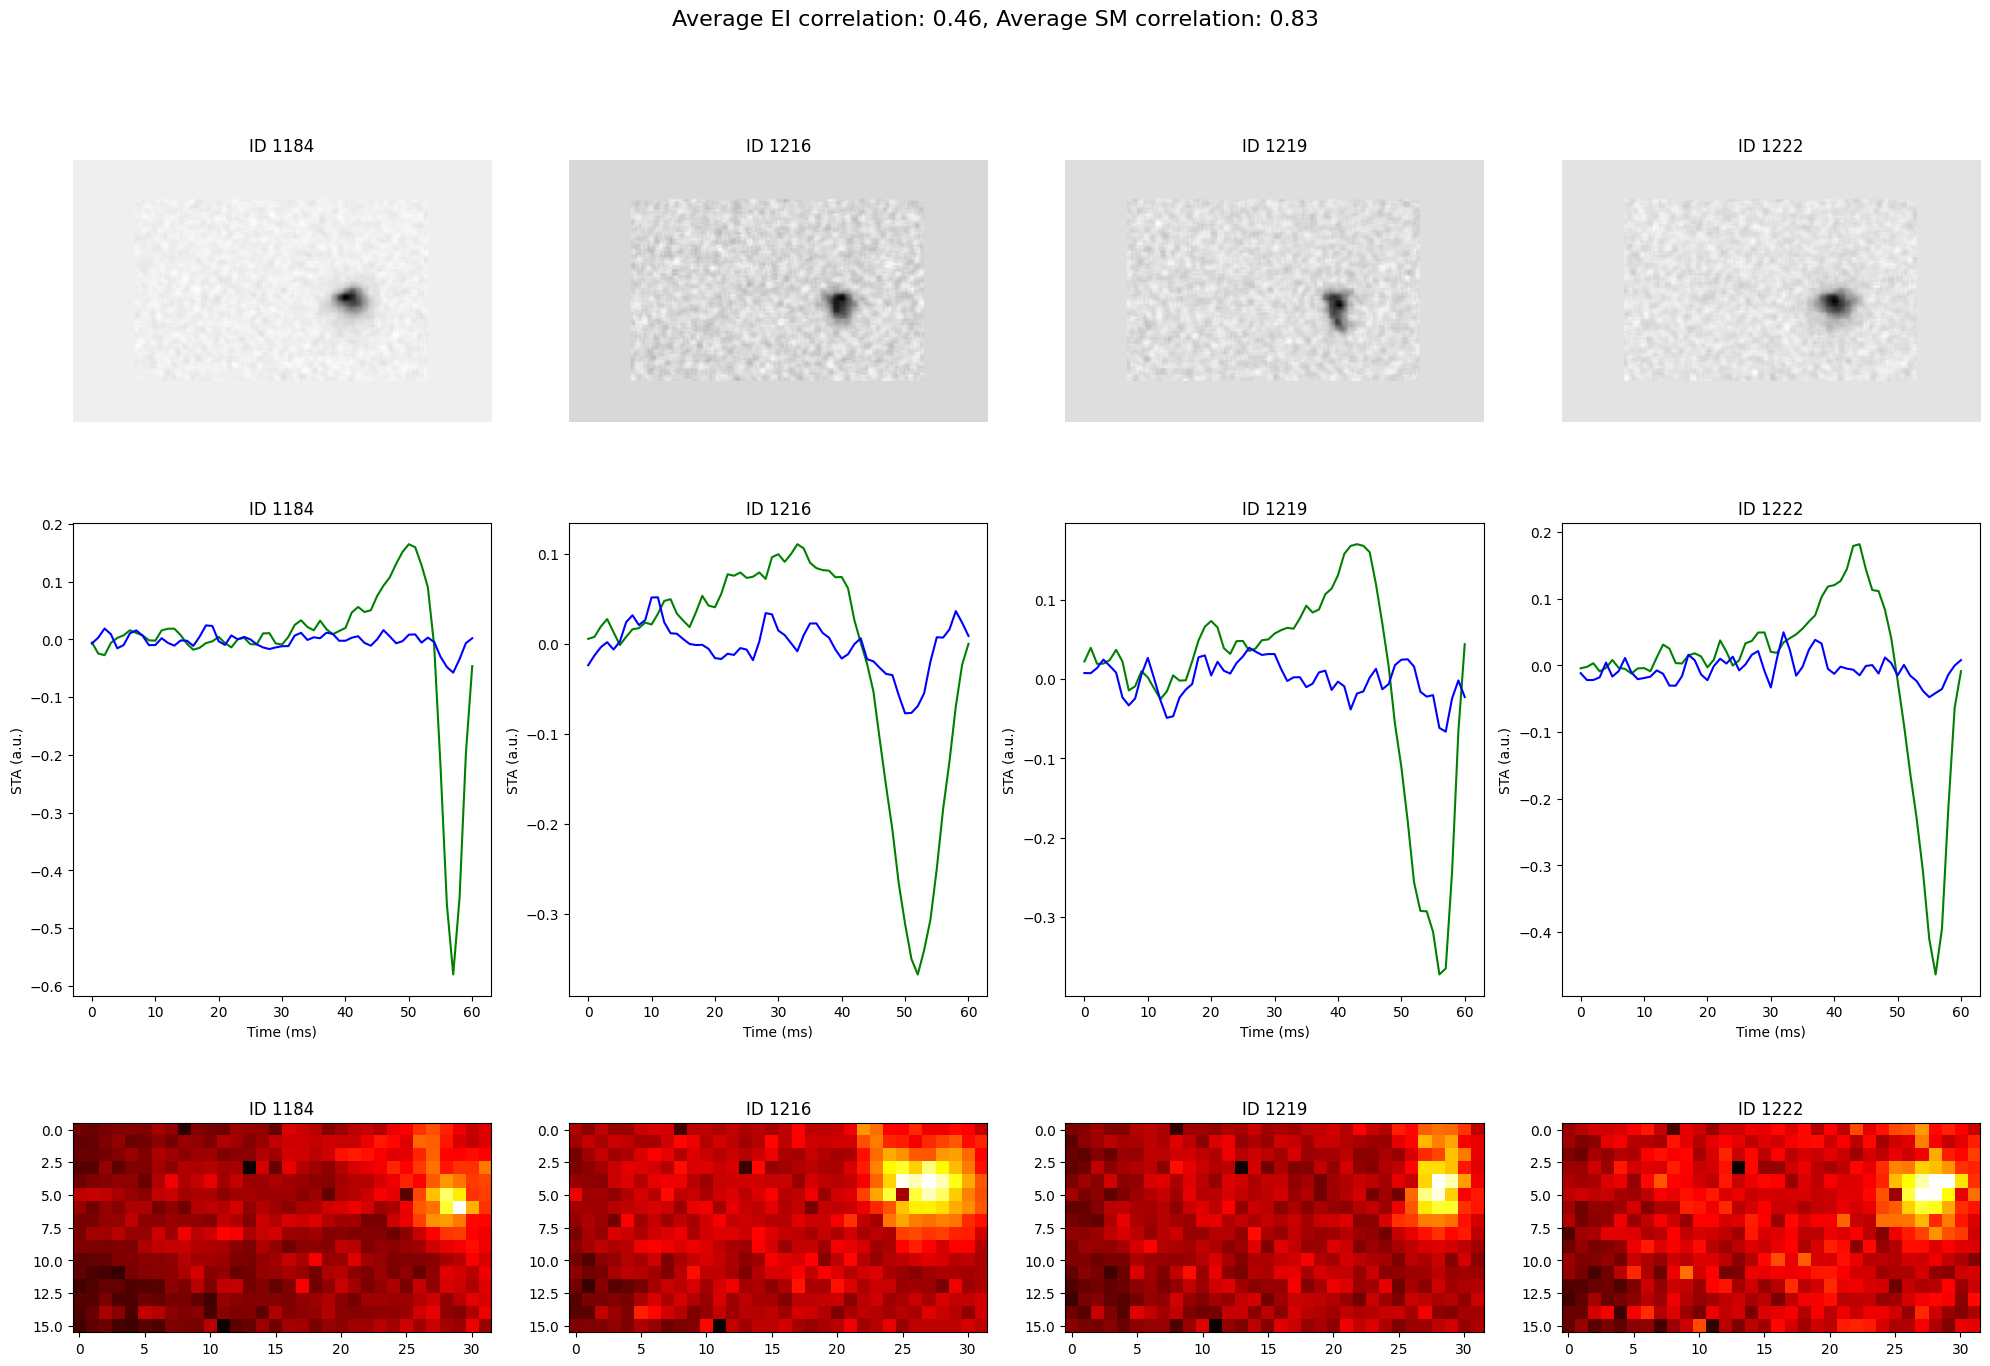

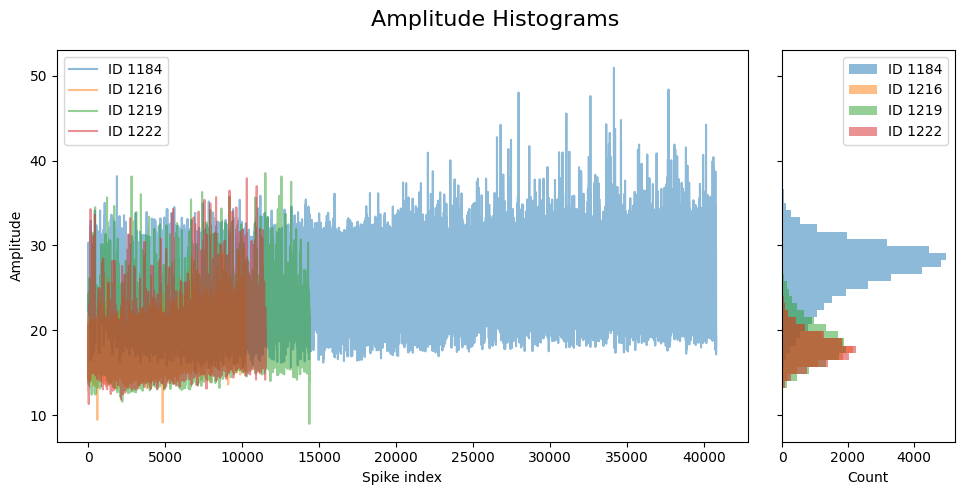

In [ ]:
#if we wanted to, we could just plot everything! (if detailed=True, plots timecourse of top electrodes)
#TODO: do we want this to be the default behavior? probably not - pull out best pairs to visualize?
#TODO: check marginal histograms for gaussian violations? to check if bimodal / needs splitting?
for pair in extended_pairs:
    dd.visualize_groups(pair, ac, detailed=False);
    dd.plot_amplitude_histograms(amplitudes, pair);